<a href="https://colab.research.google.com/github/martaldsantos/newland_project/blob/master/Group_15_Newland_2ndV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initial Steps**

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"10TVpC4_CV-h4o2U3P7KjGdvbsiuFFnkN"})   # replace the id with id of file you want to access
downloaded.GetContentFile('Train.xlsx')

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"1HGi23Z_cfEZDjoSQFlVaG5fpvmBWxIYn"})   # replace the id with id of file you want to access
downloaded.GetContentFile('Test.xlsx')

### Libraries, Packages and others

In [5]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 174kB 8.9MB/s 
     |████████████████████████████████| 22.2MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [6]:
!pip install category_encoders

     |████████████████████████████████| 81kB 4.6MB/s 


In [7]:
!pip install imbalanced-learn

In [8]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.24.0)


In [9]:
!pip install pydotplus

In [10]:
!pip install graphviz

In [11]:
import pandas as pd
import datetime
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from math import ceil
import scipy.cluster.hierarchy as shc
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.feature_selection import f_classif, chi2
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler 
from imblearn.over_sampling import ADASYN 
from imblearn.over_sampling import KMeansSMOTE
from imblearn.under_sampling import ClusterCentroids
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors
import time
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC 
import statsmodels.api as sm

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'


import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Functions 

In [12]:
def birthday_to_age(df, column, new_column):
    '''
    This function creates a column representing the difference in years from a given birth year column values
    Having into account that we are on the year 2048
    '''
    
    df[new_column] = df[column].map(lambda x : 2048 - x)
    
def questionmark_to_nan(df, column):
    '''
    This function turns a binary variable with missing values as '?' in NaN
    It needs as input the dataframe and the column name 
    (column name needs to be between '')
    '''
    df[column] = df[column].map(lambda x: np.nan if x == '?' else x)
    
def ohe(df, column_list):
    ohc = OneHotEncoder(sparse = False)
    ohc_feat = ohc.fit_transform(df[column_list])
    ohc_feat_names = ohc.get_feature_names()
    ohc_df = pd.DataFrame(ohc_feat, index = df.index, columns = ohc_feat_names)
    return ohc_df

def hist_box_maker(df,titl, num_of_rows, figx, figy):
    
    fig, axes = plt.subplots(num_of_rows, ceil((len(df.columns)*2)/num_of_rows), figsize=(figx, figy))
    temp = (list(df.columns)*2)
    temp.sort()
    # Plot data
    # Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
    i = 0 
    for ax, feat in zip(axes.flatten(), temp):
        
        if i%2 == 0:
            ax.hist(df[feat], bins = 50)
            ax.set_title(feat, y=-0.13)
            pltiswork=feat
            
        else:
            sns.boxplot(x=df[pltiswork], ax = ax)
        
        i+=1
            
    # Layout
    # Add a centered title to the figure:
    title = titl

    plt.suptitle(title)

    plt.show()# All Numer
    
    
def plot_importance(coef, name):
    imp_coef = coef.sort_values()
    plt.figure(figsize = (8,10))
    imp_coef.plot(kind = 'barh')
    plt.title('Feature Importance Using ' + name + ' Regression')
    plt.show()
    
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))
    print('F1-score, micro: ', f1_score(y_train, pred_train, average = 'micro'))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))
    print('F1-score, micro: ',f1_score(y_val, pred_val, average = 'micro'))

def hist_box_maker(df,titl, num_of_rows, figx, figy):
    
    fig, axes = plt.subplots(num_of_rows, ceil((len(df.columns)*2)/num_of_rows), figsize=(figx, figy))
    temp = (list(df.columns)*2)
    temp.sort()
    # Plot data
    # Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
    i = 0 
    for ax, feat in zip(axes.flatten(), temp):
        
        if i%2 == 0:
            ax.hist(df[feat], bins = 100)
            ax.set_title(feat, y=-0.13)
            pltiswork=feat
            
        else:
            sns.boxplot(x=df[pltiswork], ax = ax)
        
        i+=1
            
    # Layout
    # Add a centered title to the figure:
    title = titl

    plt.suptitle(title)

    plt.show()# All Numeric Variables' Box Plots in one figure
def avg_score(model):
    # apply kfold
    kf = KFold(n_splits=10)
    # create lists to store the results from the different models 
    score_train = []
    score_test = []
    timer = []
    for train_index, test_index in kf.split(X):
        # get the indexes of the observations assigned for each partition
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # start counting time
        begin = time.perf_counter()
        # fit the model to the data
        model.fit(X_train, y_train)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train
        value_train = model.score(X_train, y_train)
        # check the mean accuracy for the test
        value_test = model.score(X_test,y_test)
        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_test.append(value_test)
        timer.append(end-begin)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_test = round(np.mean(score_test),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_test = round(np.std(score_test),2)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_test) + '+/-' + str(std_test)   


def plot_tree(model):
    dot_data = export_graphviz(model,
                               feature_names=X_train_Original.columns,  
                               class_names=["High income", "Low income"],
                               filled=True)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.set_size('"20,20"')
    return graphviz.Source(pydot_graph.to_string())
    
def show_results(df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        time, avg_train, avg_test = avg_score(arg)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_test
        count+=1
    return df

def final_metrics(y_train, pred_train , y_val, pred_val, y_test, pred_test):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))
    print('F1-score, micro: ', f1_score(y_train, pred_train, average = 'micro'))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))
    print('F1-score, micro: ',f1_score(y_val, pred_val, average = 'micro'))

    print('___________________________________________________________________________________________________________')
    print('                                                     TEST                                                ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_test, pred_test))
    print(confusion_matrix(y_test, pred_test))
    print('F1-score, micro: ', f1_score(y_test, pred_test, average = 'micro'))

### Import data

In [13]:
train = pd.read_excel("Train.xlsx")
kaggle = pd.read_excel('Test.xlsx')

submission = kaggle[['CITIZEN_ID']].copy()

# **Data Pre-Processing**

## **Data Inspection**

In [14]:
train.head() #Data was imported correctly

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1


In [15]:
#No column seems to have, for now, a wrong dtype, except Birthday
train.dtypes

CITIZEN_ID                 int64
Name                      object
Birthday                  object
Native Continent          object
Marital Status            object
Lives with                object
Base Area                 object
Education Level           object
Years of Education         int64
Employment Sector         object
Role                      object
Working Hours per week     int64
Money Received             int64
Ticket Price               int64
Income                     int64
dtype: object

In [16]:
train.describe()

,CITIZEN_ID,Years of Education,Working Hours per week,Money Received,Ticket Price,Income
count,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000
mean,23685.500000,13.173884,40.483795,1324.915357,109.145313,0.237098
std,6466.467351,2.512451,12.370921,9227.771813,500.208904,0.425313
min,12486.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,18085.750000,12.000000,40.000000,0.000000,0.000000,0.000000
50%,23685.500000,13.000000,40.000000,0.000000,0.000000,0.000000
75%,29285.250000,15.000000,45.000000,0.000000,0.000000,0.000000
max,34885.000000,21.000000,99.000000,122999.000000,5358.000000,1.000000


In [17]:
train.isna().sum() #No "immediate" missing values

CITIZEN_ID                0
Name                      0
Birthday                  0
Native Continent          0
Marital Status            0
Lives with                0
Base Area                 0
Education Level           0
Years of Education        0
Employment Sector         0
Role                      0
Working Hours per week    0
Money Received            0
Ticket Price              0
Income                    0
dtype: int64

### Data Treatment


#### Categorical Variables Treatment

Lets start to treat the object type variables.

Remember that no variables seemed to show missing values.

In [18]:
for i in ["Name", "Native Continent", "Marital Status", "Lives with", "Base Area", "Education Level", "Employment Sector", "Role"]:
    train[i] = train[i].astype("str")

In [19]:
train.dtypes

CITIZEN_ID                 int64
Name                      object
Birthday                  object
Native Continent          object
Marital Status            object
Lives with                object
Base Area                 object
Education Level           object
Years of Education         int64
Employment Sector         object
Role                      object
Working Hours per week     int64
Money Received             int64
Ticket Price               int64
Income                     int64
dtype: object

All seems fine.
However in order to use Native Continent on our models we will need to later perform one hot encoding.
We can't use label encoding since the categories aren't ordered and we would be inducing orders or hierarchies were they don't exist.

In [20]:
train['Native Continent'].value_counts()

Europe     19111
Africa      2187
Asia         699
America      219
Oceania      184
Name: Native Continent, dtype: int64

These values can be turned into binary variables which describe if the person is married, not married (anymore), or never married.
This will allow us to have a better significance in our resuls (meaning, not a huge amount of 0s in binary variables), which we would
have if we proceed to make one hot encoding right now. 
We will make this change later in the feature engineering step.

In [21]:
train['Marital Status'].value_counts()

Married                         10219
Single                           7416
Divorced                         3072
Separated                         699
Widow                             696
Married - Spouse Missing          284
Married - Spouse in the Army       14
Name: Marital Status, dtype: int64

These values can be turned into binary variables. For being able to do so, we will primarily turn the values "Husband" and "Wife" in "Spouse" and "Other Family"
and "Other relatives" in only 1 value as they seem to have the same meaning.
We will make this change later in the feature engineering step.

In [22]:
train['Lives with'].value_counts()

Wife               9012
Other Family       5777
Children           3519
Alone              2362
Husband            1049
Other relatives     681
Name: Lives with, dtype: int64

We have '?' values, wich are clearly missing values, so we have to turn them into ones.
With the high number of missing values, we will probably need to use techniques to fill missing values, for example, the KNN
We also believe we cannot make one hot encoding in this variable otherwise we would create too many variables and they would loose their significance.
However, it is important to highlight that we have a lot of observations with the value Northbury, which means that if we have to make only a binary column with this variable it will have a good representation on the dataset.

In [23]:
train['Base Area'].value_counts() 

Northbury        20074
Fanfoss            443
?                  395
Alverton           135
Butterpond          96
Watford             83
Auchenshuggle       80
Pran                77
Sharnwick           70
Aroonshire          64
Laewaes             63
Fool's March        59
Eelry               56
Wigston             56
Sharpton            54
Lanercost           52
Cherrytown          51
Aerilon             45
King's Watch        44
Bellmoral           40
Kirkwall            40
Knife's Edge        37
Laenteglos          32
Tranmere            30
Drumchapel          25
Aberuthven          23
Orilon              22
Kald                19
Carlisle            18
MillerVille         17
Willesden           16
Lewes               16
Conriston           12
Marnmouth           11
Middlesbrough       10
Woodpine             9
Mensfield            9
Bellenau             8
Redwick Bush         8
Ironforge            1
Name: Base Area, dtype: int64

The categories seem to be good! We believe that a distinction as deep as the one presented is not needed, and so, we will
group some variables as the latest education a person has received.
As we are dealing with Ordinal data, meaning, the variables have a natural order, for example, a PhD is valued higher than a high school degree, we will create a variable that contains the categories representing the education qualification, in integer values, as the algorithm can process these values as an order.
We will make this change later in the feature engineering step.

In [24]:
train['Education Level'].value_counts() 

Professional School                     7232
High School + PostGraduation            4994
Bachelors + PostGraduation              3696
Masters                                 1193
Professional School + PostGraduation     953
High School - 2nd Cycle                  809
Bachelors                                735
High School - 1st Cycle                  649
Middle School - 2nd Cycle                432
Masters + PostGraduation                 397
Middle School Complete                   342
PhD                                      289
High School Complete                     287
Middle School - 1st Cycle                237
Primary School                           122
Preschool                                 33
Name: Education Level, dtype: int64

Has the same missing values problem as before, meaning, when there is missing data it is represented by a "?".
The categories have information about big groups of values (private sector, public sector, etc), so we will retrieve this information in a more correct and larger way.
After doing so, we will probably have to reach to some type of data encoding technique in order to be able to use this information in our model.
We will make this change later in the feature engineering step.

In [25]:
train['Employment Sector'].value_counts() 

Private Sector - Services     15599
Self-Employed (Individual)     1764
Public Sector - Others         1419
?                              1264
Private Sector - Others         880
Self-Employed (Company)         763
Public Sector - Government      692
Unemployed                       12
Never Worked                      7
Name: Employment Sector, dtype: int64

Has the same missing values problem as before, meaning, when there is missing data it is represented by a "?".
The grouping of information (in order to be able to have encoding) in this variable is difficult to tackle.
We will probably use the sectors of the economy to make some type of encoding in this variable.
We will make this change later in the feature engineering step.

In [26]:
train['Role'].value_counts() 

Professor                         2849
Management                        2797
Repair & constructions            2795
Administratives                   2608
Sales                             2531
Other services                    2287
Machine Operators & Inspectors    1384
?                                 1271
Transports                        1071
Cleaners & Handlers                922
Agriculture and Fishing            702
IT                                 626
Security                           450
Household Services                 102
Army                                 5
Name: Role, dtype: int64

As the name is not very important in our analysis, we will proceed on removing the first word from the name, meaning, the gender the person identifies with and we will create a variable with information about the gender.
We will make this change later in the feature engineering step.

In [27]:
train['Name'].head()

0         Mr. Adam Glover
1    Mr. Cameron McDonald
2      Mr. Keith Davidson
3      Mr. Alexander Gill
4          Mr. Neil Piper
Name: Name, dtype: object

Clearly some transformations are needed, if we want to use this variable we will have to do some engineering. 

In [28]:
train['Birthday'].head() 

0         July 1,2003
1     January 25,2006
2         May 10,2009
3       March 25,1985
4         May 29,2015
Name: Birthday, dtype: object

In [29]:
#Turning the "?" in missing value np.nan
questionmark_to_nan(train, 'Base Area') 
questionmark_to_nan(train, 'Employment Sector') 
questionmark_to_nan(train, 'Role') 

#Checking whether there are more categorical variables with "?" values
for i in ["Name", "Native Continent", "Marital Status", "Lives with", "Base Area", "Education Level", "Employment Sector", "Role"]:
  print(train[i].str.contains('?', regex = False).sum())

0
0
0
0
0
0
0
0


#### Numeric Variables Treatment

Since no variables showed *immediate* missing values, on the variables whose data type is float or int, we know that we won't have the problem of '?' missing values, otherwise the variables would be of object data type.

However we still have to check these variables to know if there are some immediate incoherences.

In [30]:
train.dtypes

CITIZEN_ID                 int64
Name                      object
Birthday                  object
Native Continent          object
Marital Status            object
Lives with                object
Base Area                 object
Education Level           object
Years of Education         int64
Employment Sector         object
Role                      object
Working Hours per week     int64
Money Received             int64
Ticket Price               int64
Income                     int64
dtype: object

In [31]:
#No repeated Citizen ID's
(train['CITIZEN_ID'].value_counts()>1).sum() 

0

## **Coherence Checks**

In [32]:
#It makes no sense to have negative values in the following numerical variables.
print("Number of negative values:")
for i in ["Years of Education", "Working Hours per week", "Money Received", "Ticket Price", "Income"]:
    print(i,":", ((train[i]<0).sum()))
#All seems to be good!

Number of negative values:
Years of Education : 0
Working Hours per week : 0
Money Received : 0
Ticket Price : 0
Income : 0


No values below 0. For now everything looks fine.

Considering the average, std and min and max values of *Years of Education* and *Working Hours per week*, there definitely seem to be some outliers, but we will check this with more detail later. Since most values of *Money Received* and *Ticket Price* are 0, we can't talk about its outliers right now. (Isto ja n faz sentido sem o describe, apagar?)

In [33]:
train[(train['Money Received']>0) & (train['Ticket Price']>0)]

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income


In the clause above we can see that there are no records that show people that have simultanously paid to go to Newland (belonging to Group C) and that have been paid to go to Newland (therefore belonging to Group B)

In [34]:
train[(train['Money Received']>=0) & (train['Ticket Price']>=0)].shape[0]

22400

This shows us that the data for these columns is correct! 

In [35]:
train[(train['Education Level'] == 'EQF4') & (train['Years of Education'] < 12)]

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income


In [36]:
train[(train['Education Level'] == 'EQF5') & (train['Years of Education'] < 12)]

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income


In [37]:
train[(train['Education Level'] == 'EQF6') & (train['Years of Education'] < 15)]

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income


In [38]:
train[(train['Education Level'] == 'EQF8') & (train['Years of Education'] < 19)]

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income


In [39]:
# train[train['Working hours per week'] > 168]

## **Data Transformation**

#### Birthday to age transformation

We have the birthday of each person, but more usefull to estimate the model is their age.

However before we calculate the age we have to do some transformations to the birthday variable.

We will calculate the age having in to account that we are on the year 2048, and we don't know the current month or day.

In [40]:
train['Birthday'].head()

0         July 1,2003
1     January 25,2006
2         May 10,2009
3       March 25,1985
4         May 29,2015
Name: Birthday, dtype: object

In [41]:
#First we extract the year of each birthday in to a new column
train["YOB"] = train['Birthday'].str.split(' ', n = 2, expand = True)[2].str.split(',', n = 1, expand = True)[1]

In [42]:
train["YOB"].head()

0    2003
1    2006
2    2009
3    1985
4    2015
Name: YOB, dtype: object

In [43]:
train['YOB'] = train['YOB'].astype('int64') #Turns year of birth in to dtype int

In [44]:
birthday_to_age(train, 'YOB', 'Age') #Turns year of birth to age

In [45]:
train[['Age']].describe().T #All seems fine

,count,mean,std,min,25%,50%,75%,max
Age,22400.0,38.584866,13.651578,17.0,28.0,37.0,48.0,90.0


In [46]:
#And we drop the columns we will no longer need
train.drop(columns = ['Birthday', 'YOB'], inplace = True)

Age - Coherence Check

In [47]:
train[train['Age'] < 17]

,CITIZEN_ID,Name,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Age


#### Base Area -> Northbury

There are a lot of base areas, however most observations belong to Northbury, so instead of using one hot encoding and proceding with all the values, we will just proced with a variable that signals whether the person is of Northbury or not.

In [48]:
train['Northbury'] = train['Base Area'].map(lambda x: 1 if x == 'Northbury' else 0)

In [49]:
train['Northbury'].value_counts()

1    20074
0     2326
Name: Northbury, dtype: int64

In [50]:
train.drop(columns = ['Base Area'], inplace = True)

#### Name -> Gender -> Male

It doesn't make sense to model using the different names in the dataset, however with the first byte of each one (for example: Mrs.) we can conclude quite easily the gender of each person. Having the gender we can then create a variable that signals all the males.

In [51]:
train['Gender'] = train['Name'].str.split(' ', n = 1, expand = True)[0] 

In [52]:
train['Gender'].value_counts()

Mr.     14971
Mrs.     4117
Miss     3312
Name: Gender, dtype: int64

In [53]:
train['Male'] = train['Gender'].map(lambda x: 1 if x == 'Mr.' else 0)

In [54]:
train['Male'].value_counts()

1    14971
0     7429
Name: Male, dtype: int64

In [55]:
train.drop(columns = ['Name', 'Gender'], inplace = True)

### *Lives with* and *Marital Status*


In [56]:
train['Marital Status'] = train['Marital Status'].map(lambda x: 'Married' if ((x == 'Married - Spouse Missing') | (x == 'Married - Spouse in the Army') ) else x)
train['Marital Status'] = train['Marital Status'].map(lambda x: 'Not Married' if ((x == 'Divorced')  | (x == 'Separated') | (x == 'Widow')) else x)
train['Marital Status'] = train['Marital Status'].map(lambda x: 'Never Married' if ((x == 'Single') ) else x)

There are no weird values and one hot encoding will be needed for the same reasons as in the previous variable.

However some values seem to specific and have very little representation on the observations, so we will "standardize" this values: "Married - Spouse Missing" and "Married - Spouse in the Army" will be changed to "Married".

There is no point in discretizing between living with Wife or Husband, so we will aggregate it in Spouse. Same thing with other relatives and Other Family.

In [57]:
train['Lives with'] = train['Lives with'].map(lambda x: 'Spouse' if ((x == 'Wife') | (x == 'Husband')) else x)
train['Lives with'] = train['Lives with'].map(lambda x: 'Other Family' if (x == 'Other relatives') else x)

### Education Level

- https://en.wikipedia.org/wiki/Education_in_the_United_States
- http://internacional.ipvc.pt/sites/default/files/Diagrama_SESP_EQF_PT1.pdf
- https://europa.eu/europass/pt/description-eight-eqf-levels

Division will have to be made top to bottom. Meaning, if it appears "Masters" and "PostGraduation", we will treat first "Masters" to make sure we have the maximum education first.

In [58]:
train["Education Level"].value_counts()

Professional School                     7232
High School + PostGraduation            4994
Bachelors + PostGraduation              3696
Masters                                 1193
Professional School + PostGraduation     953
High School - 2nd Cycle                  809
Bachelors                                735
High School - 1st Cycle                  649
Middle School - 2nd Cycle                432
Masters + PostGraduation                 397
Middle School Complete                   342
PhD                                      289
High School Complete                     287
Middle School - 1st Cycle                237
Primary School                           122
Preschool                                 33
Name: Education Level, dtype: int64

In [59]:
train['Education Level'] = train['Education Level'].map(lambda x: 'Masters' if ("Masters" in x) else x)
train['Education Level'] = train['Education Level'].map(lambda x: 'PostGraduation' if ("PostGraduation" in x) else x)
train['Education Level'] = train['Education Level'].map(lambda x: 'Incomplete High School' if ((x== "High School - 2nd Cycle") | (x== "High School - 1st Cycle")) else x)
train['Education Level'] = train['Education Level'].map(lambda x: 'Less than Middle School' if ((x=="Middle School - 2nd Cycle") | (x== "Middle School - 1st Cycle") | (x== "Primary School") |(x== "Preschool" )) else x)
train['Education Level'] = train['Education Level'].map(lambda x: '<HighSchool' if ((x=="Incomplete High School") | (x== "Less than Middle School") | (x== "Middle School Complete")) else x)
train["Education Level"].value_counts()

PostGraduation          9643
Professional School     7232
<HighSchool             2624
Masters                 1590
Bachelors                735
PhD                      289
High School Complete     287
Name: Education Level, dtype: int64

In [60]:
train['Education Level'] = train['Education Level'].map(lambda x: 'EQF3 or less' if ((x=="<HighSchool")) else x)
train['Education Level'] = train['Education Level'].map(lambda x: 'EQF4' if ((x=="High School Complete")) else x)
train['Education Level'] = train['Education Level'].map(lambda x: 'EQF5' if ((x=="Professional School")) else x)
train['Education Level'] = train['Education Level'].map(lambda x: 'EQF6' if ((x=="Bachelors")) else x)
train['Education Level'] = train['Education Level'].map(lambda x: 'EQF7' if ((x=="Masters") | (x== "PostGraduation")) else x)
train['Education Level'] = train['Education Level'].map(lambda x: 'EQF8' if ((x=="PhD")) else x)
train["Education Level"].value_counts()

EQF7            11233
EQF5             7232
EQF3 or less     2624
EQF6              735
EQF8              289
EQF4              287
Name: Education Level, dtype: int64

### Profession


In [61]:
train["Employment Sector"] = train["Employment Sector"].astype("str")
train["Employment Sector"].value_counts()

Private Sector - Services     15599
Self-Employed (Individual)     1764
Public Sector - Others         1419
nan                            1264
Private Sector - Others         880
Self-Employed (Company)         763
Public Sector - Government      692
Unemployed                       12
Never Worked                      7
Name: Employment Sector, dtype: int64

In [62]:
train["Employment Sector"]= train["Employment Sector"].map(lambda x: 'Private Sector' if ("Private Sector" in x) else x)
train["Employment Sector"]= train["Employment Sector"].map(lambda x: 'Public Sector' if ("Public Sector" in x) else x)
train["Employment Sector"]= train["Employment Sector"].map(lambda x: 'Self Employed' if ("Self-Employed" in x) else x)
train['Employment Sector'] = train['Employment Sector'].map(lambda x: 'Not Working' if ((x=="Unemployed") | (x== "Never Worked")) else x)
train['Employment Sector'] = train['Employment Sector'].map(lambda x: np.nan if ((x=="nan")) else x)

In [63]:
train["Employment Sector"].value_counts()

Private Sector    16479
Self Employed      2527
Public Sector      2111
Not Working          19
Name: Employment Sector, dtype: int64

### Role

In [64]:
train["Role"].value_counts()

Professor                         2849
Management                        2797
Repair & constructions            2795
Administratives                   2608
Sales                             2531
Other services                    2287
Machine Operators & Inspectors    1384
Transports                        1071
Cleaners & Handlers                922
Agriculture and Fishing            702
IT                                 626
Security                           450
Household Services                 102
Army                                 5
Name: Role, dtype: int64

1st Sector: Agriculture and Fishing <br> 
2nd Sector:Repair & constructions, Machine Operators & Inspectors <br>
3rd Sector: Administratives, Sales, Other services, Transports, Cleaners & Handlers, Household Services, Security, Army <br> 
4th Sector: IT, Professor, Management <br>

In [65]:
train["Role"]= train["Role"].map(lambda x: '1st Sector' if ((x=="Agriculture and Fishing")) else x)
train["Role"]= train["Role"].map(lambda x: '2nd Sector' if ((x=="Repair & constructions") | (x== "Machine Operators & Inspectors"))else x)
train["Role"]= train["Role"].map(lambda x: '3rd Sector' if ((x== "Administratives")| (x== "Sales")| (x== "Other services")| (x== "Transports")| (x== "Cleaners & Handlers")| (x== "Household Services")| (x== "Security")| (x== "Army"))else x)
train["Role"]= train["Role"].map(lambda x: '4th Sector' if ((x=="IT") | (x== "Professor")| (x== "Management"))else x)

In [66]:
train["Role"].value_counts()

3rd Sector    9976
4th Sector    6272
2nd Sector    4179
1st Sector     702
Name: Role, dtype: int64

### Ticket Price and Money

As for the description of the project, we have noticed that ticket price represents the information of how much someone payed to go to the planet, and, money received represents the money someone was payed to go to Newland. 

Given so, we consider that both variables represent the same thing but in different directions. We will then proceed to join both, adding the inverse sign to one of them (mudaria a descrição ligeiramente)

In [67]:
train["MONEY_TICKET"] = train["Money Received"].map(lambda x: -x ) + train["Ticket Price"]

In [68]:
train["Native Continent"].value_counts()

Europe     19111
Africa      2187
Asia         699
America      219
Oceania      184
Name: Native Continent, dtype: int64

Money Received and Ticket Price Binary

In [69]:
train['Money_Received_Binary'] = train['Money Received'].map(lambda x: 1 if x > 0 else 0)
train['Ticket_Price_Binary'] = train['Ticket Price'].map(lambda x: 1 if x > 0 else 0)
train['Money_Ticket_Binary'] = train['Money_Received_Binary'] + train['Ticket_Price_Binary']

## **Missing Values Imputation**

In [70]:
((train.isna().sum())/(train.shape[0])*100)

CITIZEN_ID                0.000000
Native Continent          0.000000
Marital Status            0.000000
Lives with                0.000000
Education Level           0.000000
Years of Education        0.000000
Employment Sector         5.642857
Role                      5.674107
Working Hours per week    0.000000
Money Received            0.000000
Ticket Price              0.000000
Income                    0.000000
Age                       0.000000
Northbury                 0.000000
Male                      0.000000
MONEY_TICKET              0.000000
Money_Received_Binary     0.000000
Ticket_Price_Binary       0.000000
Money_Ticket_Binary       0.000000
dtype: float64

In [71]:
#Copy dataframe
mv_imputation = train.copy()

In [72]:
#"Encode" the variables with missing values
mv_imputation['Employment Sector'] = mv_imputation['Employment Sector'].map(lambda x: 0 if (x == 'Private Sector')
                              else 1 if x == ('Public Sector')
                              else 2 if x == ('Self Employed')
                              else 3 if x == ('Not Working')
                              else x)

mv_imputation['Role'] = mv_imputation['Role'].map(lambda x: 0 if (x == '1st Sector')
                              else 1 if x == ('2nd Sector')
                              else 2 if x == ('3rd Sector')
                              else 3 if x == ('4th Sector')
                              else x)

In [73]:
#Split data between rows with and without missing values
to_impute_ES = mv_imputation[mv_imputation['Employment Sector'].isna()].copy()
to_train_ES = mv_imputation[~mv_imputation['Employment Sector'].isna()].copy()

#Define independent variables
independent_var = ['Years of Education', 'Working Hours per week', 'MONEY_TICKET', 'Age']

#Split data
MV_train, MV_val, ES_train, ES_val = train_test_split(to_train_ES[independent_var], to_train_ES['Employment Sector'], test_size = 0.40, stratify = to_train_ES['Employment Sector'], random_state = 15)

#Standardize the data
min_max_MV = MinMaxScaler().fit(MV_train)
MV_train[MV_train.columns.to_list()] = min_max_MV.transform(MV_train)
MV_val[MV_val.columns.to_list()] = min_max_MV.transform(MV_val) 

#Define and fit the model
nn_ES = MLPClassifier(hidden_layer_sizes = (5,5), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, max_iter = 1000,  alpha=0.00001, random_state = 3).fit(MV_train,ES_train)

#Print all the scores
print('The training score for Employment Sector is :' ,nn_ES.score(MV_train,ES_train))
print('The validation score for Employment Sector is :',nn_ES.score(MV_val,ES_val))
print('With the mode the training set score for Employment Sector would be ', (ES_train == to_train_ES["Employment Sector"].mode()[0]).sum() / ES_train.shape[0])
print('With the mode the validation set score for Employment Sector would be ',(ES_val == to_train_ES["Employment Sector"].mode()[0]).sum() / ES_val.shape[0])

#Split data between rows with and without missing values
to_impute_R = mv_imputation[mv_imputation['Role'].isna()].copy()
to_train_R = mv_imputation[~mv_imputation['Role'].isna()].copy()

#Split data
MV_train, MV_val, R_train, R_val = train_test_split(to_train_R[independent_var], to_train_R['Role'], test_size = 0.40, stratify = to_train_R['Role'], random_state = 15)

#Standardize the data
min_max_MV = MinMaxScaler().fit(MV_train)
MV_train[MV_train.columns.to_list()] = min_max_MV.transform(MV_train)
MV_val[MV_val.columns.to_list()] = min_max_MV.transform(MV_val) 

#Define and fit the model
nn_R = MLPClassifier(hidden_layer_sizes = (5,5), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, max_iter = 1000,  alpha=0.00001, random_state = 3).fit(MV_train,R_train)

#Print all the scores
print('The training score for Role is :' ,nn_R.score(MV_train,R_train))
print('The validation score for Role is :',nn_R.score(MV_val,R_val))
print('With the mode the training set score for Role would be ', (R_train == to_train_R["Role"].mode()[0]).sum() / R_train.shape[0])
print('With the mode the validation set score for Role would be ',(R_val == to_train_R["Role"].mode()[0]).sum() / R_val.shape[0])

The training score for Employment Sector is : 0.7792760823278921
The validation score for Employment Sector is : 0.7808397397989355
With the mode the training set score for Employment Sector would be  0.7796703729989748
With the mode the validation set score for Employment Sector would be  0.7796570076877587
The training score for Role is : 0.5794746391101996
The validation score for Role is : 0.5778513961192617
With the mode the training set score for Role would be  0.47219373668849096
With the mode the validation set score for Role would be  0.4720776147657359


In [74]:
#Impute the missing values

mv_imputation['Employment Sector'][mv_imputation['Employment Sector'].isna()] = nn_ES.predict(to_impute_ES[independent_var])
mv_imputation['Role'][mv_imputation['Role'].isna()] = nn_R.predict(to_impute_R[independent_var])


#Turn the values to their original categories
mv_imputation['Employment Sector'] = mv_imputation['Employment Sector'].map(lambda x: 'Private Sector' if (x == 0)
                              else 'Public Sector' if (x == 1)
                              else 'Self Employed' if (x == 2)
                              else 'Not Working' if (x == 3)
                              else x)

mv_imputation['Role'] = mv_imputation['Role'].map(lambda x: '1st Sector' if (x == 0)
                              else '2nd Sector' if (x == 1)
                              else '3rd Sector' if (x == 2)
                              else '4th Sector' if (x == 3)
                              else x)

In [75]:
train = mv_imputation.copy()

In [76]:
#train["Employment Sector"]= train["Employment Sector"].fillna(train["Employment Sector"].mode()[0])
#train["Role"]= train["Role"].fillna(train["Role"].mode()[0])

In [77]:
((train.isna().sum())/(train.shape[0])*100)

CITIZEN_ID                0.0
Native Continent          0.0
Marital Status            0.0
Lives with                0.0
Education Level           0.0
Years of Education        0.0
Employment Sector         0.0
Role                      0.0
Working Hours per week    0.0
Money Received            0.0
Ticket Price              0.0
Income                    0.0
Age                       0.0
Northbury                 0.0
Male                      0.0
MONEY_TICKET              0.0
Money_Received_Binary     0.0
Ticket_Price_Binary       0.0
Money_Ticket_Binary       0.0
dtype: float64

## **Data Encoding**

In [78]:
train_encoding = train.copy()

In [79]:
print("Number of Categories in: ")
for ColName in train[['Native Continent','Marital Status','Lives with', "Employment Sector","Role"]]:
    print("{} = {}".format(ColName,len(train[ColName].unique())))

Number of Categories in: 
Native Continent = 5
Marital Status = 3
Lives with = 4
Employment Sector = 4
Role = 4


#### One Hot Encoding

In [80]:
one_hot_var = ohe(train_encoding, ['Native Continent', 'Marital Status', 'Lives with', "Employment Sector", "Role"])

In [81]:
train_encoding = pd.concat([train_encoding.drop(columns = ['Native Continent', 'Marital Status', 'Lives with', "Employment Sector", "Role"]), one_hot_var], axis = 1)

In [82]:
train_encoding.columns

Index(['CITIZEN_ID', 'Education Level', 'Years of Education',
       'Working Hours per week', 'Money Received', 'Ticket Price', 'Income',
       'Age', 'Northbury', 'Male', 'MONEY_TICKET', 'Money_Received_Binary',
       'Ticket_Price_Binary', 'Money_Ticket_Binary', 'x0_Africa', 'x0_America',
       'x0_Asia', 'x0_Europe', 'x0_Oceania', 'x1_Married', 'x1_Never Married',
       'x1_Not Married', 'x2_Alone', 'x2_Children', 'x2_Other Family',
       'x2_Spouse', 'x3_Not Working', 'x3_Private Sector', 'x3_Public Sector',
       'x3_Self Employed', 'x4_1st Sector', 'x4_2nd Sector', 'x4_3rd Sector',
       'x4_4th Sector'],
      dtype='object')

#### Label Encoding

In [83]:
train_encoding["Education Level"].value_counts()

EQF7            11233
EQF5             7232
EQF3 or less     2624
EQF6              735
EQF8              289
EQF4              287
Name: Education Level, dtype: int64

In [84]:
# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['Education Level'],return_df=True, mapping=[{'col':'Education Level','mapping':{'EQF3 or less':0,'EQF4':1,'EQF5':2,'EQF6':3,'EQF7':4,'EQF8':5}}])

#fit and transform train data 
train_encoding = encoder.fit_transform(train_encoding)

In [85]:
train_encoding = train_encoding.rename(columns={"Native Continent": "CONTINENT", "Lives with": "LIVES_WITH", 'Education Level': "EDUCATION_LVL",
                      'Years of Education': "YEARS_EDUCATION", 'Employment Sector': "EMPLOY_SECTOR", 'Role': "ECON_SECTOR",
                      'Working Hours per week': "WORKING_HOURS", 'Income': "INCOME",'Marital Status': "MARITAL_STATUS" })

In [86]:
train = train_encoding.copy()

### **Variables Transformation**

In [87]:
train["Not_Together"] = train[["x1_Not Married", 'x1_Never Married']].sum(axis=1)

## Outlier analysis

In [88]:
train.columns

Index(['CITIZEN_ID', 'EDUCATION_LVL', 'YEARS_EDUCATION', 'WORKING_HOURS',
       'Money Received', 'Ticket Price', 'INCOME', 'Age', 'Northbury', 'Male',
       'MONEY_TICKET', 'Money_Received_Binary', 'Ticket_Price_Binary',
       'Money_Ticket_Binary', 'x0_Africa', 'x0_America', 'x0_Asia',
       'x0_Europe', 'x0_Oceania', 'x1_Married', 'x1_Never Married',
       'x1_Not Married', 'x2_Alone', 'x2_Children', 'x2_Other Family',
       'x2_Spouse', 'x3_Not Working', 'x3_Private Sector', 'x3_Public Sector',
       'x3_Self Employed', 'x4_1st Sector', 'x4_2nd Sector', 'x4_3rd Sector',
       'x4_4th Sector', 'Not_Together'],
      dtype='object')

In [89]:
train_num = train[['YEARS_EDUCATION','WORKING_HOURS','Money Received','Ticket Price','Age']]

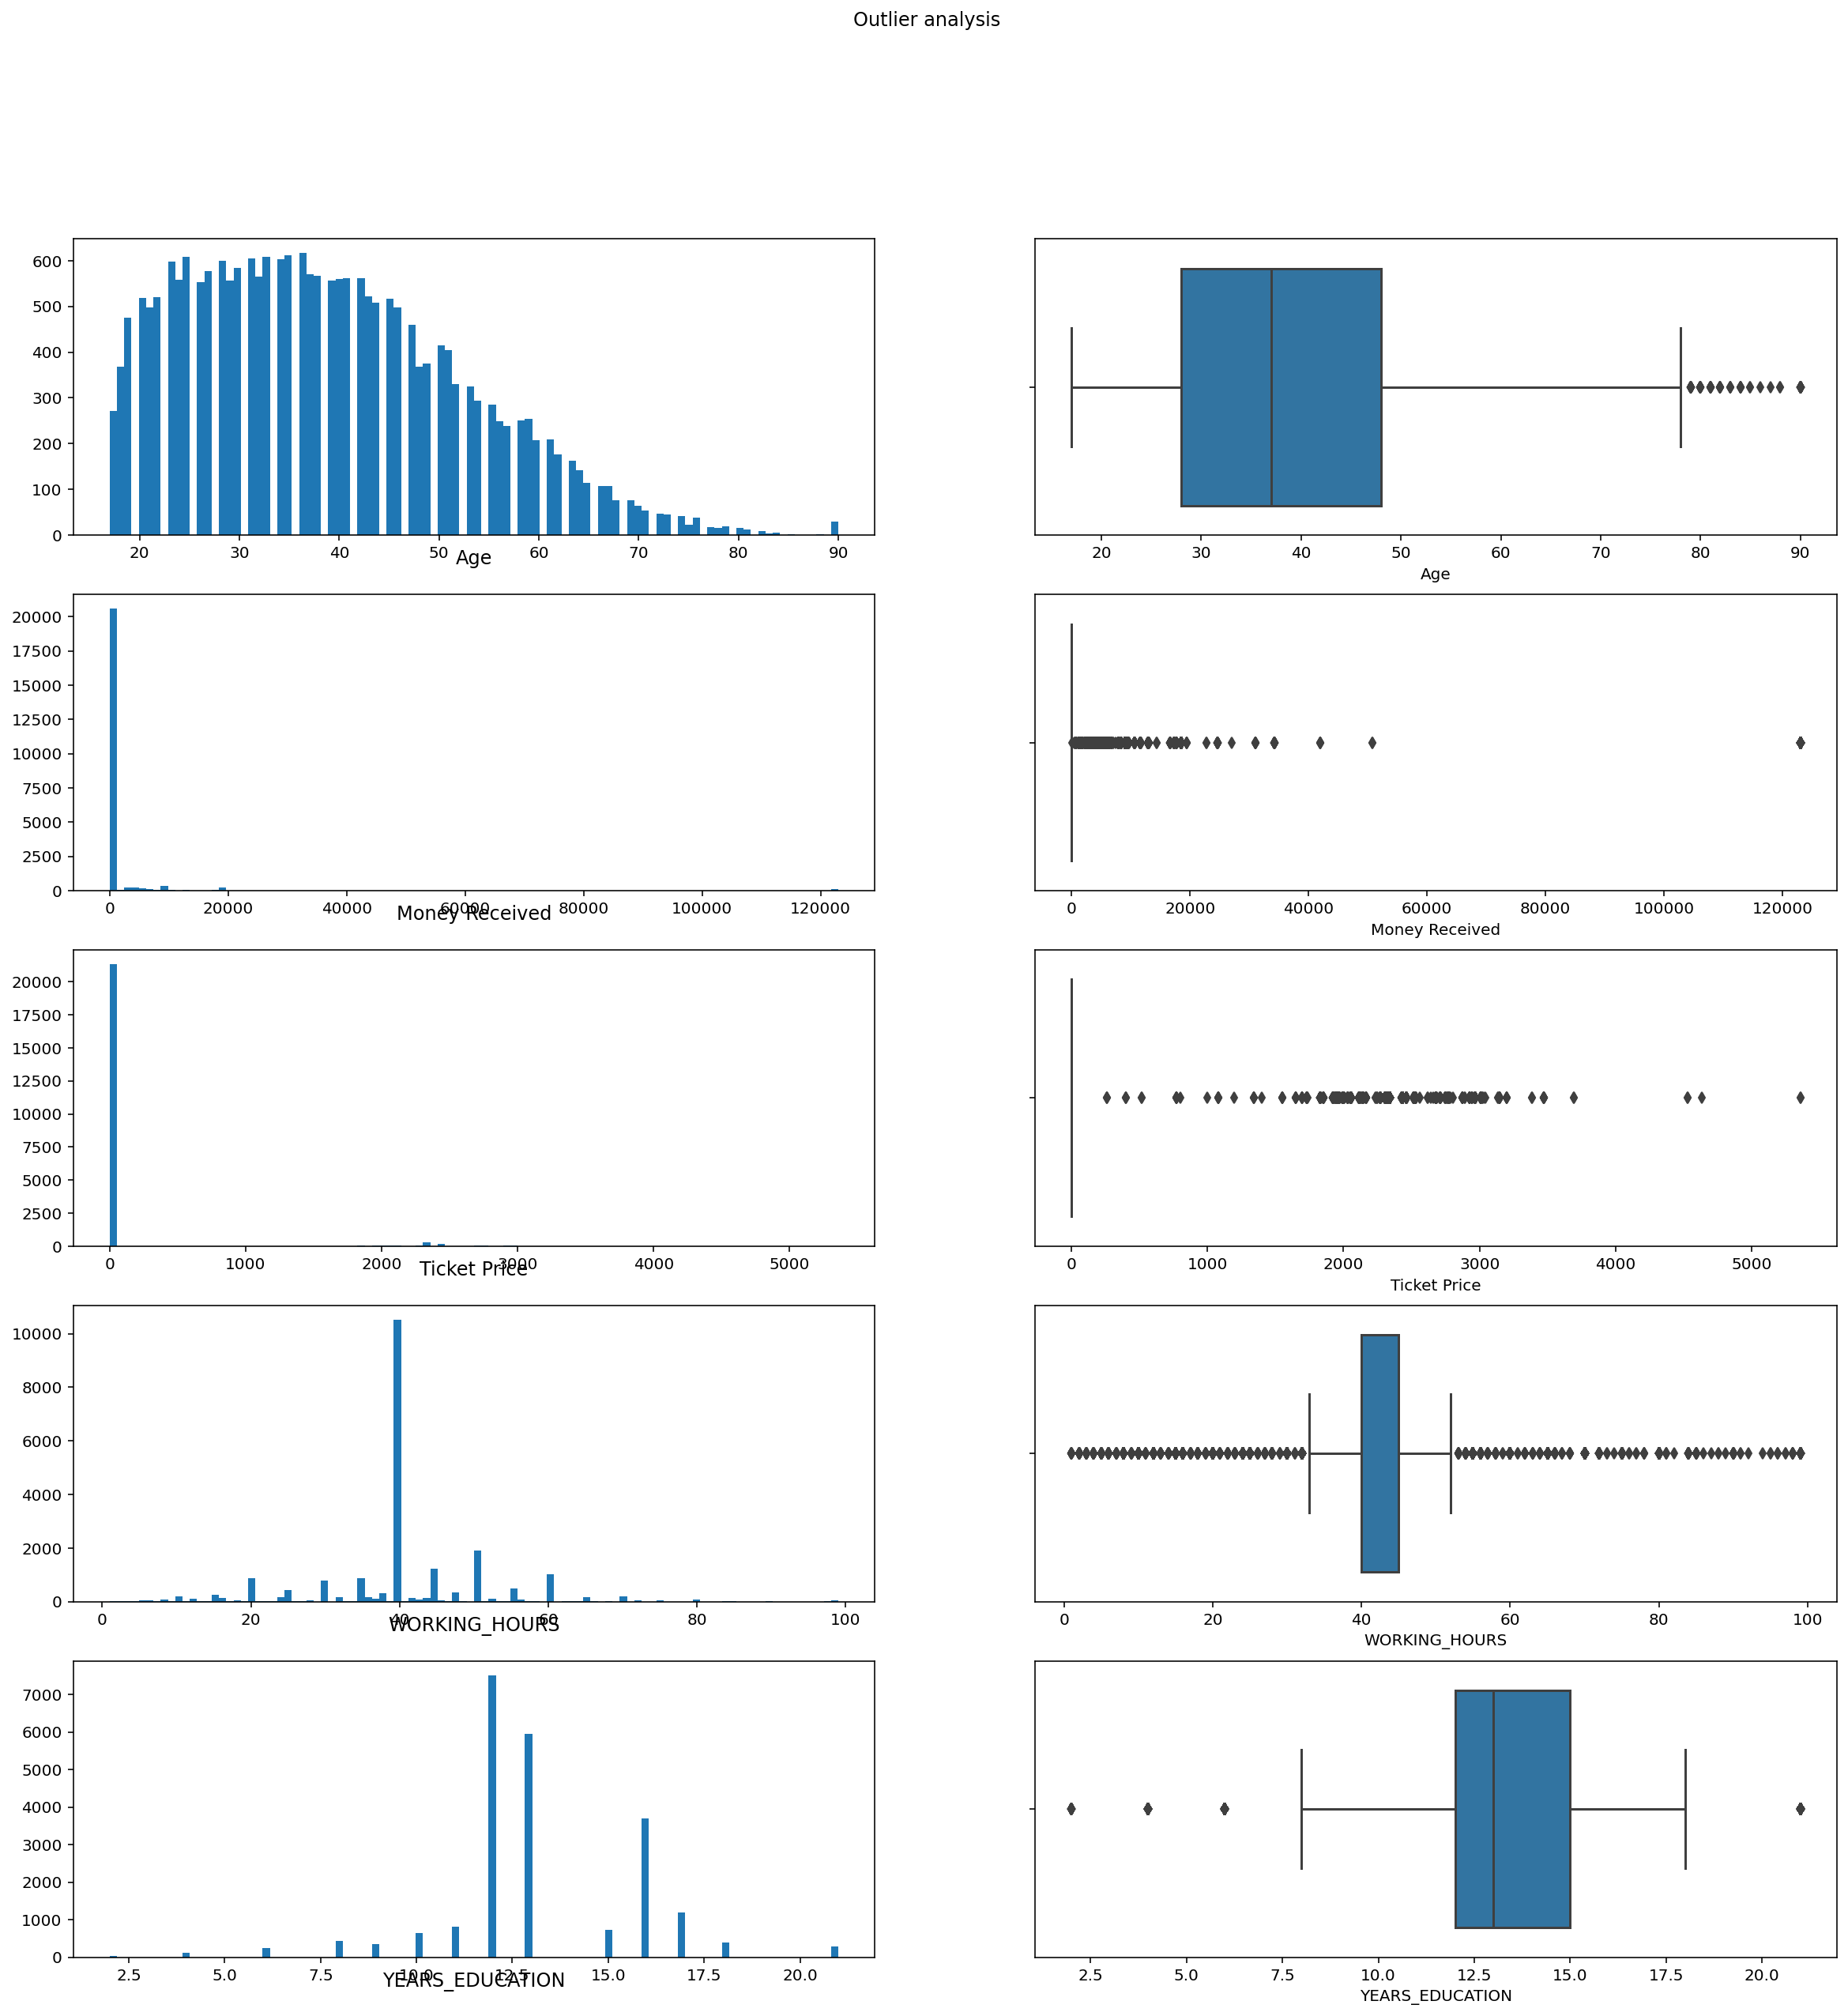

In [90]:
hist_box_maker(train_num,'Outlier analysis',5,20,20)

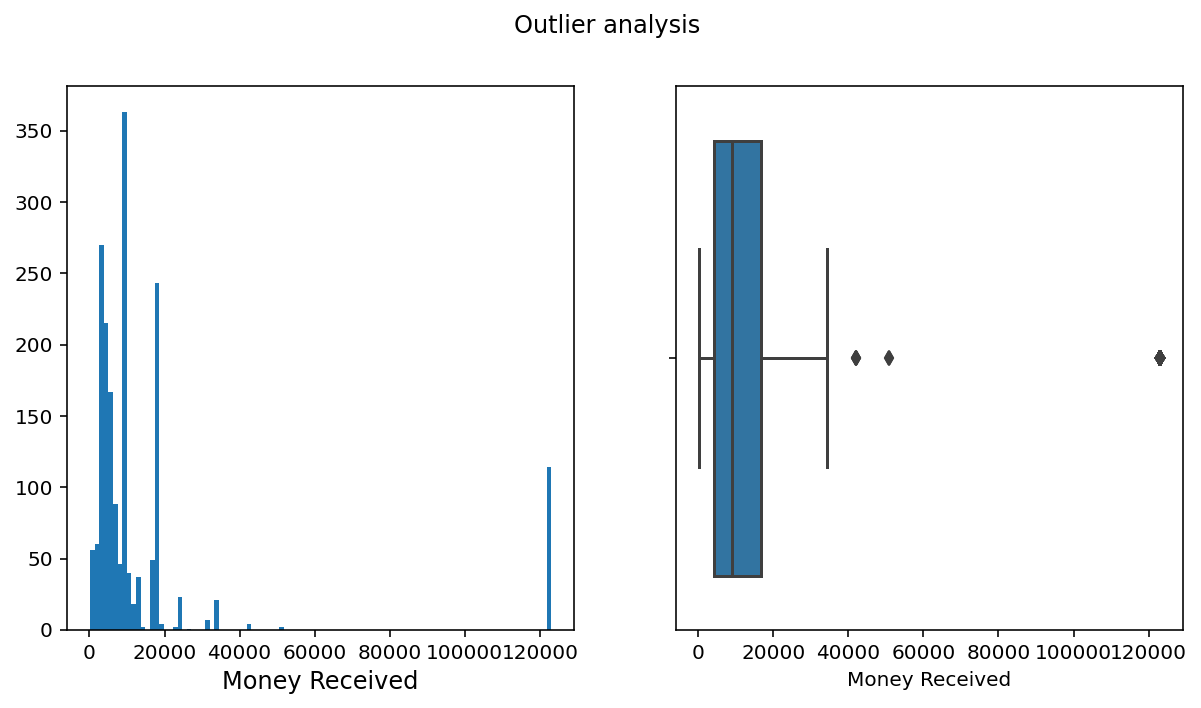

In [91]:
hist_box_maker(train_num[['Money Received']][(train_num['Money Received'] != 0)],'Outlier analysis',1,10,5)

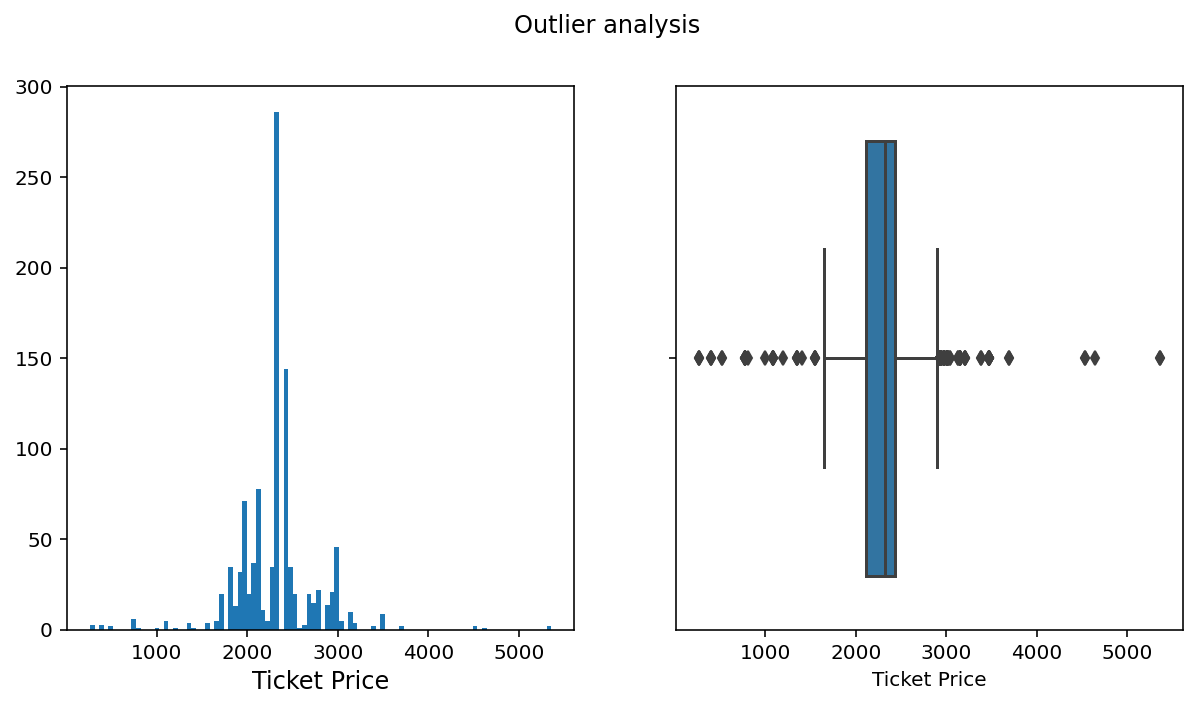

In [92]:
hist_box_maker(train_num[['Ticket Price']][(train['Ticket Price'] != 0)],'Outlier analysis',1,10,5)

In [93]:
filters_train = (
                    (train['Age'] > 89) |
                    (train['Money Received'] > 30000) |
                    (train['Ticket Price'] > 4000) |
                    (train['WORKING_HOURS'] > 95) |
                    (train['YEARS_EDUCATION'] > 20)
                                                          )

In [94]:
#Dataframe with outliers

train_out = train.copy()

In [95]:
train[(~(filters_train))].shape[0] /train.shape[0]

0.9767857142857143

In [96]:
train=train[(~(filters_train))]

### **Filter methods**

## Correlation Feature Selection

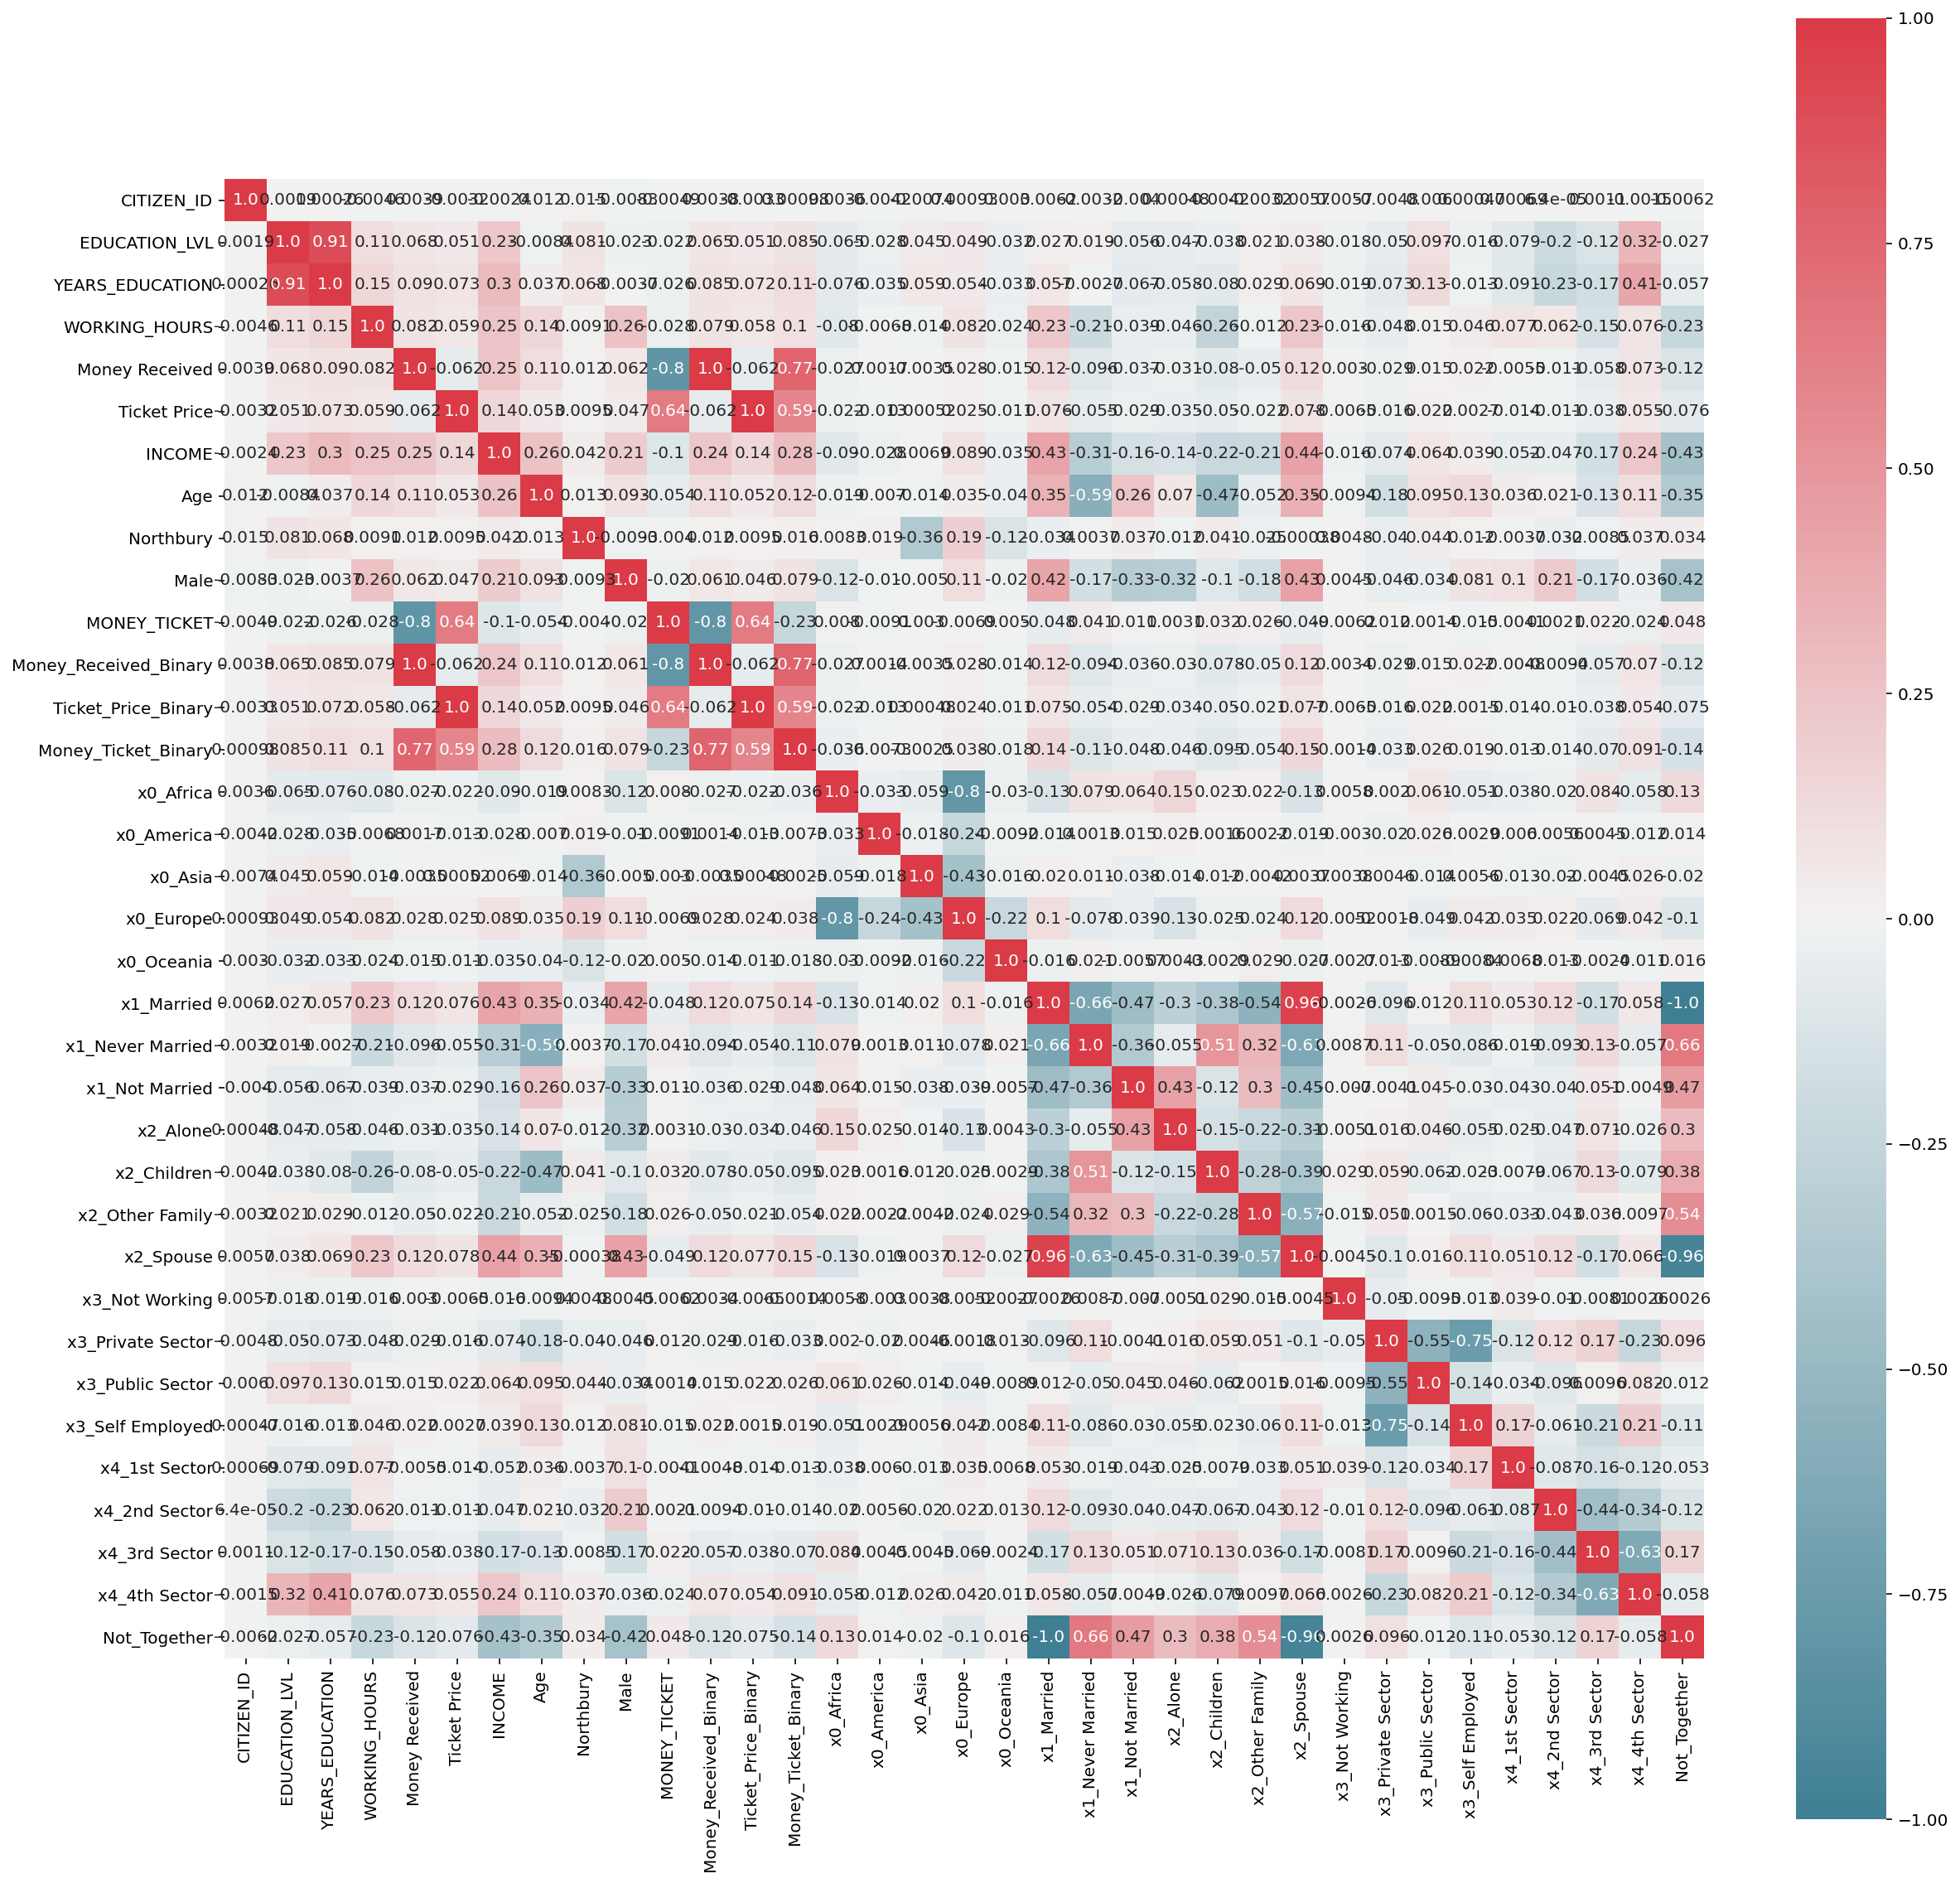

In [97]:
train_corr=train.corr(method = "spearman")
plt.figure(figsize=(20,20))
sns.heatmap(data = train_corr, annot = True, cmap=sns.diverging_palette(220, 10, as_cmap=True), fmt='.2',  vmin=-1, vmax=1, center=0,square=True )

In [98]:
from scipy import stats
shapiro_test = stats.shapiro(train)
shapiro_test

(0.17105823755264282, 0.0)

In [99]:
train.drop(columns =["EDUCATION_LVL", "x1_Married", "CITIZEN_ID", "x0_Africa"], inplace = True)

In [100]:
binary = train.drop(columns = ['YEARS_EDUCATION', 'WORKING_HOURS', 'Money Received', 'Ticket Price', 'Age', 'INCOME','MONEY_TICKET']).columns.to_list()

In [101]:
chi2_score, chi_2_p_value = chi2(train[binary], train['INCOME'])
f_score, f_p_value = f_classif(train[train.drop(columns=binary).columns.to_list()],train['INCOME'])
print('Binary Columns: ', train[binary].columns)
print('Metric Columns: ', train.drop(columns=binary).columns)
print('chi2 score        ', chi2_score)
print('chi2 p-value      ', chi_2_p_value)
print('F - score score   ', f_score)
print('F - score p-value ', f_p_value)

Binary Columns:  Index(['Northbury', 'Male', 'Money_Received_Binary', 'Ticket_Price_Binary',
       'Money_Ticket_Binary', 'x0_America', 'x0_Asia', 'x0_Europe',
       'x0_Oceania', 'x1_Never Married', 'x1_Not Married', 'x2_Alone',
       'x2_Children', 'x2_Other Family', 'x2_Spouse', 'x3_Not Working',
       'x3_Private Sector', 'x3_Public Sector', 'x3_Self Employed',
       'x4_1st Sector', 'x4_2nd Sector', 'x4_3rd Sector', 'x4_4th Sector',
       'Not_Together'],
      dtype='object')
Metric Columns:  Index(['YEARS_EDUCATION', 'WORKING_HOURS', 'Money Received', 'Ticket Price',
       'INCOME', 'Age', 'MONEY_TICKET'],
      dtype='object')
chi2 score         [3.99889248e+00 3.17777129e+02 1.12743725e+03 4.18643727e+02
 1.52421659e+03 1.65434498e+01 1.01728526e+00 2.55215433e+01
 2.66817095e+01 1.42198600e+03 4.69789030e+02 3.64005564e+02
 9.09542899e+02 6.92293471e+02 2.36837865e+03 5.55087699e+00
 3.06455051e+01 8.02728463e+01 2.73481964e+01 5.63900647e+01
 3.99664433e+01 3.36058288

In [102]:
#variables to drop due to chi-squared
train.drop(columns =["Northbury", 'x0_Asia'], inplace = True)

In [103]:
#variables to drop due to multicoliniarity
train.drop(columns =['x2_Alone', 'x4_3rd Sector', 'x3_Not Working'], inplace = True)

## Bins

In [104]:
YEARS_EDUCATION_Bin = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile').fit(train[['YEARS_EDUCATION']])
train['YEARS_EDUCATION_Bin'] = YEARS_EDUCATION_Bin.transform(train[['YEARS_EDUCATION']])
WORKING_HOURS_Bin = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile').fit(train[['WORKING_HOURS']])
train['WORKING_HOURS_Bin'] = WORKING_HOURS_Bin.transform(train[['WORKING_HOURS']])
Money_Received_Bin = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile').fit(train[['Money Received']])
train['Money Received_Bin'] = Money_Received_Bin.transform(train[['Money Received']])
Ticket_Price_Bin = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile').fit(train[['Ticket Price']])
train['Ticket Price_Bin'] = Ticket_Price_Bin.transform(train[['Ticket Price']])
Age_Bin = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile').fit(train[['Age']])
train['Age_Bin'] = Age_Bin.transform(train[['Age']])

In [105]:
bin_columns = ['YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin']

## Kaggle Transformations

In [106]:
for i in ["Name", "Native Continent", "Marital Status", "Lives with", "Base Area", "Education Level", "Employment Sector", "Role"]:
    kaggle[i] = kaggle[i].astype("str")
    
questionmark_to_nan(kaggle, 'Base Area') 
questionmark_to_nan(kaggle, 'Employment Sector') 
questionmark_to_nan(kaggle, 'Role')

kaggle["YOB"] = kaggle['Birthday'].str.split(' ', n = 2, expand = True)[2].str.split(',', n = 1, expand = True)[1]
kaggle['YOB'] = kaggle['YOB'].astype('int64')
birthday_to_age(kaggle, 'YOB', 'Age')
kaggle.drop(columns = ['Birthday', 'YOB'], inplace = True)

kaggle['Northbury'] = kaggle['Base Area'].map(lambda x: 1 if x == 'Northbury' else 0)
kaggle.drop(columns = ['Base Area'], inplace = True)

kaggle['Gender'] = kaggle['Name'].str.split(' ', n = 1, expand = True)[0] 
kaggle['Male'] = kaggle['Gender'].map(lambda x: 1 if x == 'Mr.' else 0)
kaggle.drop(columns = ['Name', 'Gender'], inplace = True)

kaggle['Marital Status'] = kaggle['Marital Status'].map(lambda x: 'Married' if ((x == 'Married - Spouse Missing') | (x == 'Married - Spouse in the Army') ) else x)
kaggle['Marital Status'] = kaggle['Marital Status'].map(lambda x: 'Not Married' if ((x == 'Divorced')  | (x == 'Separated') | (x == 'Widow')) else x)
kaggle['Marital Status'] = kaggle['Marital Status'].map(lambda x: 'Never Married' if ((x == 'Single') ) else x)


kaggle['Lives with'] = kaggle['Lives with'].map(lambda x: 'Spouse' if ((x == 'Wife') | (x == 'Husband')) else x)
kaggle['Lives with'] = kaggle['Lives with'].map(lambda x: 'Other Family' if (x == 'Other relatives') else x)



kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'Masters' if ("Masters" in x) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'PostGraduation' if ("PostGraduation" in x) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'Incomplete High School' if ((x== "High School - 2nd Cycle") | (x== "High School - 1st Cycle")) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'Less than Middle School' if ((x=="Middle School - 2nd Cycle") | (x== "Middle School - 1st Cycle") | (x== "Primary School") |(x== "Preschool" )) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: '<HighSchool' if ((x=="Incomplete High School") | (x== "Less than Middle School") | (x== "Middle School Complete")) else x)

kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'EQF3 or less' if ((x=="<HighSchool")) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'EQF4' if ((x=="High School Complete")) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'EQF5' if ((x=="Professional School")) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'EQF6' if ((x=="Bachelors")) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'EQF7' if ((x=="Masters") | (x== "PostGraduation")) else x)
kaggle['Education Level'] = kaggle['Education Level'].map(lambda x: 'EQF8' if ((x=="PhD")) else x)

kaggle["Employment Sector"] = kaggle["Employment Sector"].astype("str")
kaggle["Employment Sector"]= kaggle["Employment Sector"].map(lambda x: 'Private Sector' if ("Private Sector" in x) else x)
kaggle["Employment Sector"]= kaggle["Employment Sector"].map(lambda x: 'Public Sector' if ("Public Sector" in x) else x)
kaggle["Employment Sector"]= kaggle["Employment Sector"].map(lambda x: 'Self Employed' if ("Self-Employed" in x) else x)
kaggle['Employment Sector'] = kaggle['Employment Sector'].map(lambda x: 'Not Working' if ((x=="Unemployed") | (x== "Never Worked")) else x)
kaggle['Employment Sector'] = kaggle['Employment Sector'].map(lambda x: np.nan if ((x=="nan")) else x)


kaggle["Role"]= kaggle["Role"].map(lambda x: '1st Sector' if ((x=="Agriculture and Fishing")) else x)
kaggle["Role"]= kaggle["Role"].map(lambda x: '2nd Sector' if ((x=="Repair & constructions") | (x== "Machine Operators & Inspectors"))else x)
kaggle["Role"]= kaggle["Role"].map(lambda x: '3rd Sector' if ((x== "Administratives")| (x== "Sales")| (x== "Other services")| (x== "Transports")| (x== "Cleaners & Handlers")| (x== "Household Services")| (x== "Security")| (x== "Army"))else x)
kaggle["Role"]= kaggle["Role"].map(lambda x: '4th Sector' if ((x=="IT") | (x== "Professor")| (x== "Management"))else x)

kaggle["MONEY_TICKET"] = kaggle["Money Received"].map(lambda x: -x ) + kaggle["Ticket Price"]
kaggle['Money_Received_Binary'] = kaggle['Money Received'].map(lambda x: 1 if x > 0 else 0)
kaggle['Ticket_Price_Binary'] = kaggle['Ticket Price'].map(lambda x: 1 if x > 0 else 0)
kaggle['Money_Ticket_Binary'] = kaggle['Money_Received_Binary'] + kaggle['Ticket_Price_Binary']



kaggle["Employment Sector"]= kaggle["Employment Sector"].fillna(kaggle["Employment Sector"].mode()[0])
kaggle["Role"]= kaggle["Role"].fillna(kaggle["Role"].mode()[0])


one_hot_var = ohe(kaggle, ['Native Continent', 'Marital Status', 'Lives with', "Employment Sector", "Role"])
kaggle = pd.concat([kaggle.drop(columns = ['Native Continent', 'Marital Status', 'Lives with', "Employment Sector", "Role"]), one_hot_var], axis = 1)
encoder= ce.OrdinalEncoder(cols=['Education Level'],return_df=True, mapping=[{'col':'Education Level','mapping':{'EQF3 or less':0,'EQF4':1,'EQF5':2,'EQF6':3,'EQF7':4,'EQF8':5}}])
kaggle = encoder.fit_transform(kaggle)

kaggle["Not_Together"] = kaggle[["x1_Not Married", 'x1_Never Married']].sum(axis=1)


kaggle = kaggle.rename(columns={"Native Continent": "CONTINENT", "Lives with": "LIVES_WITH", 'Education Level': "EDUCATION_LVL",
                      'Years of Education': "YEARS_EDUCATION", 'Employment Sector': "EMPLOY_SECTOR", 'Role': "ECON_SECTOR",
                      'Working Hours per week': "WORKING_HOURS", 'Income': "INCOME",'Marital Status': "MARITAL_STATUS" })

kaggle.drop(columns =["EDUCATION_LVL", "x1_Married", "CITIZEN_ID", "x0_Africa"], inplace = True)
kaggle.drop(columns =["Northbury", 'x0_Asia'], inplace = True)
kaggle.drop(columns =['x2_Alone', 'x4_3rd Sector', 'x3_Not Working'], inplace = True)


kaggle['YEARS_EDUCATION_Bin'] = YEARS_EDUCATION_Bin.transform(kaggle[['YEARS_EDUCATION']])
kaggle['WORKING_HOURS_Bin'] = WORKING_HOURS_Bin.transform(kaggle[['WORKING_HOURS']])
kaggle['Money Received_Bin'] = Money_Received_Bin.transform(kaggle[['Money Received']])
kaggle['Ticket Price_Bin'] = Ticket_Price_Bin.transform(kaggle[['Ticket Price']])
kaggle['Age_Bin'] = Age_Bin.transform(kaggle[['Age']])

# Train test Split

In [107]:
X = train.drop(columns = ['INCOME'])
y = train['INCOME']

In [108]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.40, stratify = y, random_state = 15)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.50, stratify = y_val, random_state = 15)

In [109]:
#Min max scaling

min_max = MinMaxScaler().fit(X_train)
X_train[X_train.columns.to_list()] = min_max.transform(X_train)
X_val[X_val.columns.to_list()] = min_max.transform(X_val) 
X_test[X_test.columns.to_list()] = min_max.transform(X_test)
kaggle[kaggle.columns.to_list()] = min_max.transform(kaggle)

In [110]:
#Standard scaling

#std = StandardScaler().fit(X_train)
#X_train[X_train.columns.to_list()] = std.transform(X_train)
#X_val[X_val.columns.to_list()] = std.transform(X_val) 
#X_test[X_test.columns.to_list()] = std.transform(X_test)
#kaggle[kaggle.columns.to_list()] = std.transform(kaggle)

In [111]:
#Df's to be used

X_train_Original = X_train.drop(columns = ['Money_Received_Binary', 'Ticket_Price_Binary', "MONEY_TICKET", 'Money_Ticket_Binary', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])
X_val_Original = X_val.drop(columns = ['Money_Received_Binary', 'Ticket_Price_Binary', "MONEY_TICKET", 'Money_Ticket_Binary', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])
X_test_Original = X_test.drop(columns = ['Money_Received_Binary', 'Ticket_Price_Binary', "MONEY_TICKET", 'Money_Ticket_Binary', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])

X_train_MTB = X_train.drop(columns = ['Money Received', 'Ticket Price', "MONEY_TICKET", 'Money_Ticket_Binary', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])
X_val_MTB = X_val.drop(columns = ['Money Received', 'Ticket Price', "MONEY_TICKET", 'Money_Ticket_Binary', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])
X_test_MTB = X_test.drop(columns = ['Money Received', 'Ticket Price', "MONEY_TICKET", 'Money_Ticket_Binary', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])

X_train_MT = X_train.drop(columns = ['Money_Received_Binary', 'Ticket_Price_Binary','Money Received', 'Ticket Price', 'MONEY_TICKET', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])
X_val_MT = X_val.drop(columns = ['Money_Received_Binary', 'Ticket_Price_Binary','Money Received', 'Ticket Price', 'MONEY_TICKET', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])
X_test_MT = X_test.drop(columns = ['Money_Received_Binary', 'Ticket_Price_Binary','Money Received', 'Ticket Price', 'MONEY_TICKET', 'YEARS_EDUCATION_Bin', 'WORKING_HOURS_Bin', 'Money Received_Bin', 'Ticket Price_Bin', 'Age_Bin','Not_Together'])

X_train_Bin = X_train.drop(columns = ['Money Received', 'Ticket Price', 'Money_Received_Binary', 'Ticket_Price_Binary','Money Received', 'Ticket Price', 'MONEY_TICKET', 'YEARS_EDUCATION', 'WORKING_HOURS', 'Age','Not_Together'])
X_val_Bin = X_val.drop(columns = ['Money Received', 'Ticket Price', 'Money_Received_Binary', 'Ticket_Price_Binary','Money Received', 'Ticket Price', 'MONEY_TICKET', 'YEARS_EDUCATION', 'WORKING_HOURS', 'Age','Not_Together'])
X_test_Bin = X_test.drop(columns = ['Money Received', 'Ticket Price', 'Money_Received_Binary', 'Ticket_Price_Binary','Money Received', 'Ticket Price', 'MONEY_TICKET', 'YEARS_EDUCATION', 'WORKING_HOURS', 'Age','Not_Together'])

# **Feature Selection**


In [ ]:
binary_original = X_train_Original.drop(columns = ['YEARS_EDUCATION', 'WORKING_HOURS', 'Money Received', 'Ticket Price', 'Age']).columns.to_list()

### **Wrapper method**

In [ ]:
N = 1
model_rfe = LogisticRegression(random_state = 5)
rfe = RFE(estimator = model_rfe, n_features_to_select = N)
X_rfe = rfe.fit_transform(X = X_train_Original[binary_original], y = y_train) 

selected_features_rfe = pd.Series(rfe.ranking_, index = X_train_Original[binary_original].columns)
selected_features_rfe.sort_values()

x2_Spouse             1
x2_Children           2
x4_4th Sector         3
x0_Oceania            4
x4_1st Sector         5
x0_America            6
x1_Never Married      7
x2_Other Family       8
x3_Public Sector      9
Male                 10
x1_Not Married       11
x4_3rd Sector        12
x0_Europe            13
x3_Private Sector    14
x3_Self Employed     15
dtype: int64

In [ ]:
N = 1
model_rfe = LogisticRegression(random_state = 5)
rfe = RFE(estimator = model_rfe, n_features_to_select = N)
X_rfe = rfe.fit_transform(X = X_train_Original.drop(columns=X_train_Original[binary_original]), y = y_train) 

selected_features_rfe = pd.Series(rfe.ranking_, index = X_train_Original.drop(columns=X_train_Original[binary_original]).columns)
selected_features_rfe.sort_values()

Money Received     1
YEARS_EDUCATION    2
WORKING_HOURS      3
Age                4
Ticket Price       5
dtype: int64

### **Intrinsic Methods**


#### Decision Tree Classifier - gini and entropy - binary variables

In [ ]:
gini_importance = DecisionTreeClassifier().fit(X_train_Original[binary_original], y_train).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_train_Original[binary_original], y_train).feature_importances_

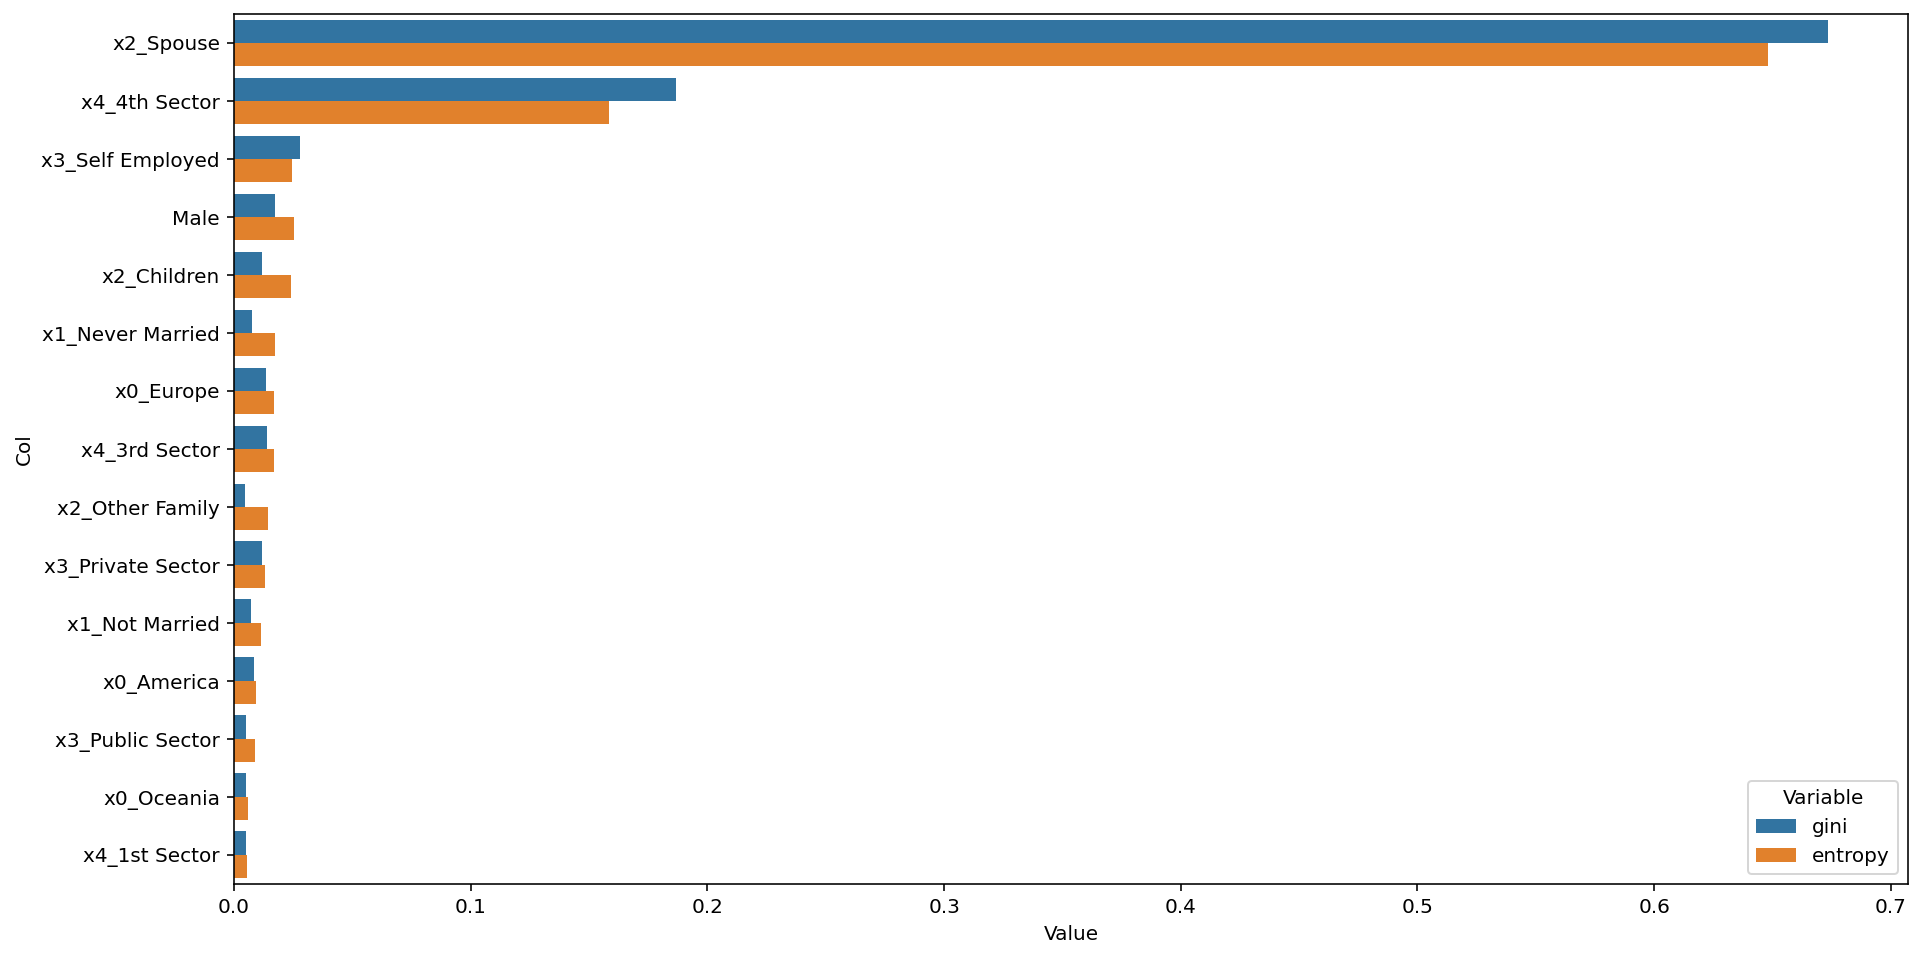

In [ ]:
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_train_Original[binary_original].columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

#### Decision Tree Classifier - gini and entropy - numerical variables

In [ ]:
gini_importance = DecisionTreeClassifier().fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train).feature_importances_

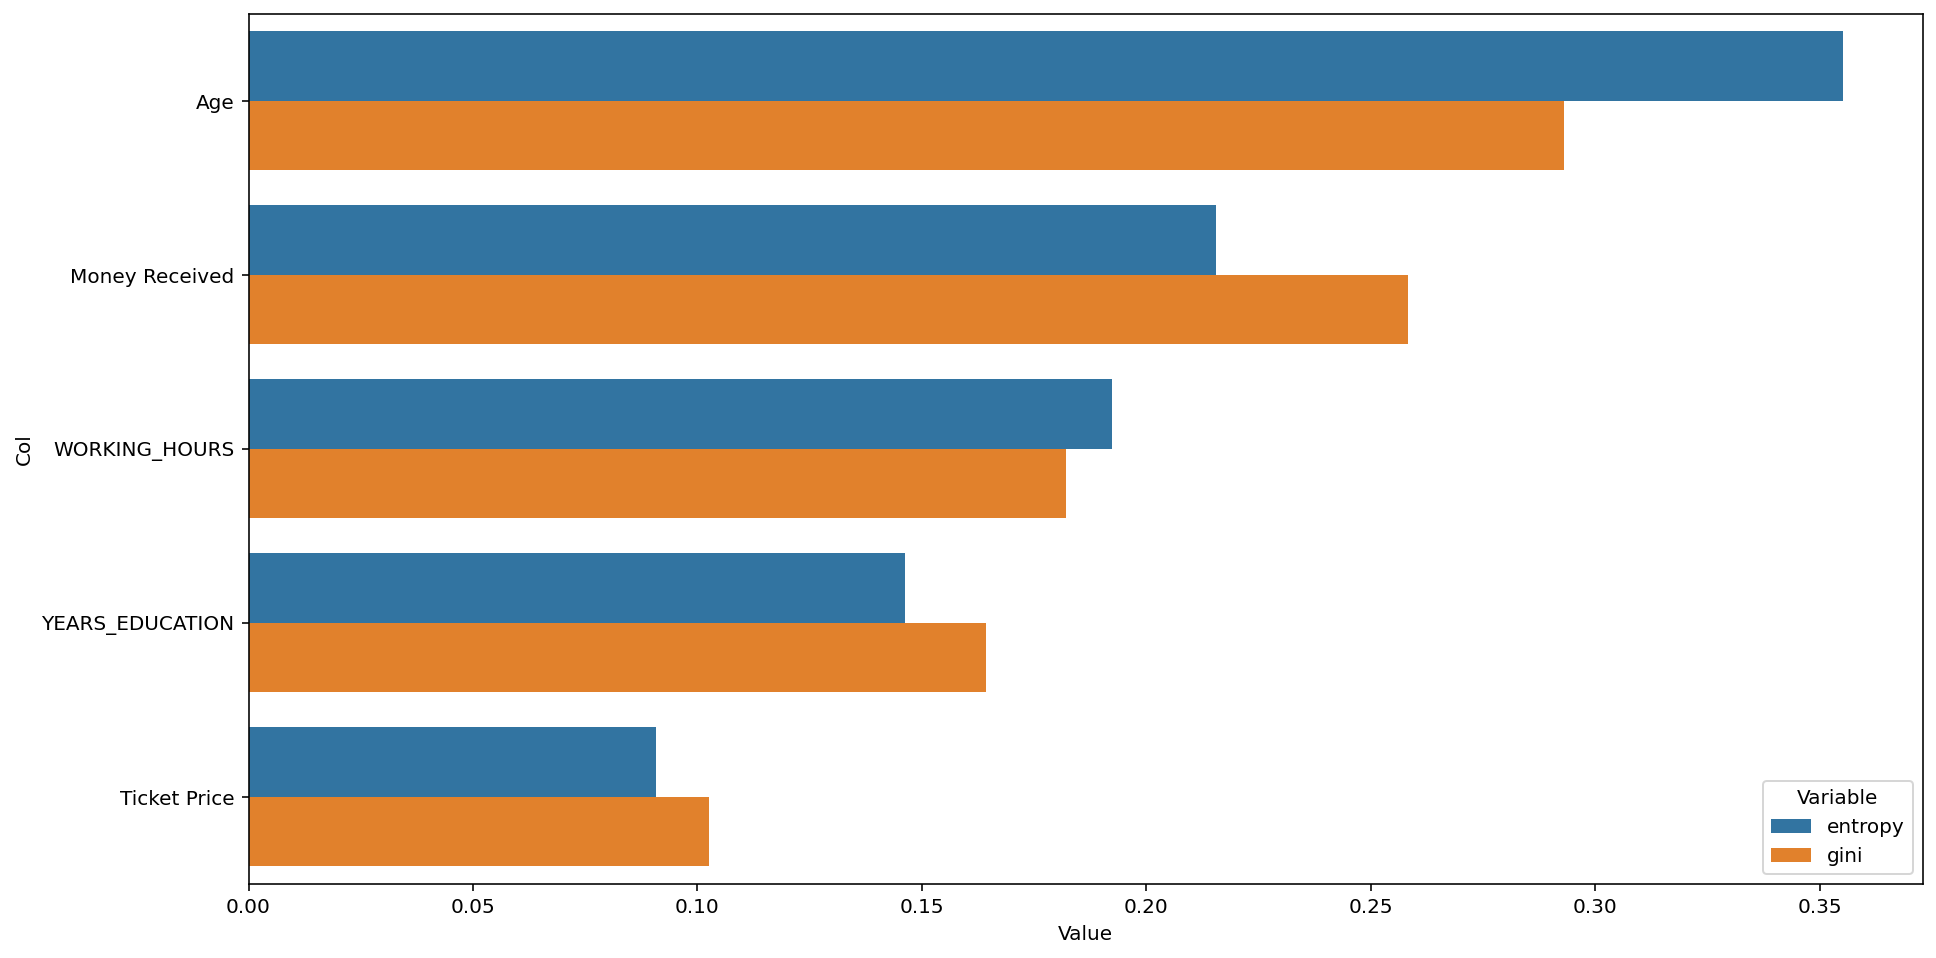

In [ ]:
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_train_Original.drop(columns=X_train_Original[binary_original]).columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

#### Random Forest Classifier - gini and entropy - binary variables

In [ ]:
gini_importanceRF = RandomForestClassifier().fit(X_train_Original[binary_original], y_train).feature_importances_
entropy_importanceRF = RandomForestClassifier(criterion='entropy').fit(X_train_Original[binary_original], y_train).feature_importances_

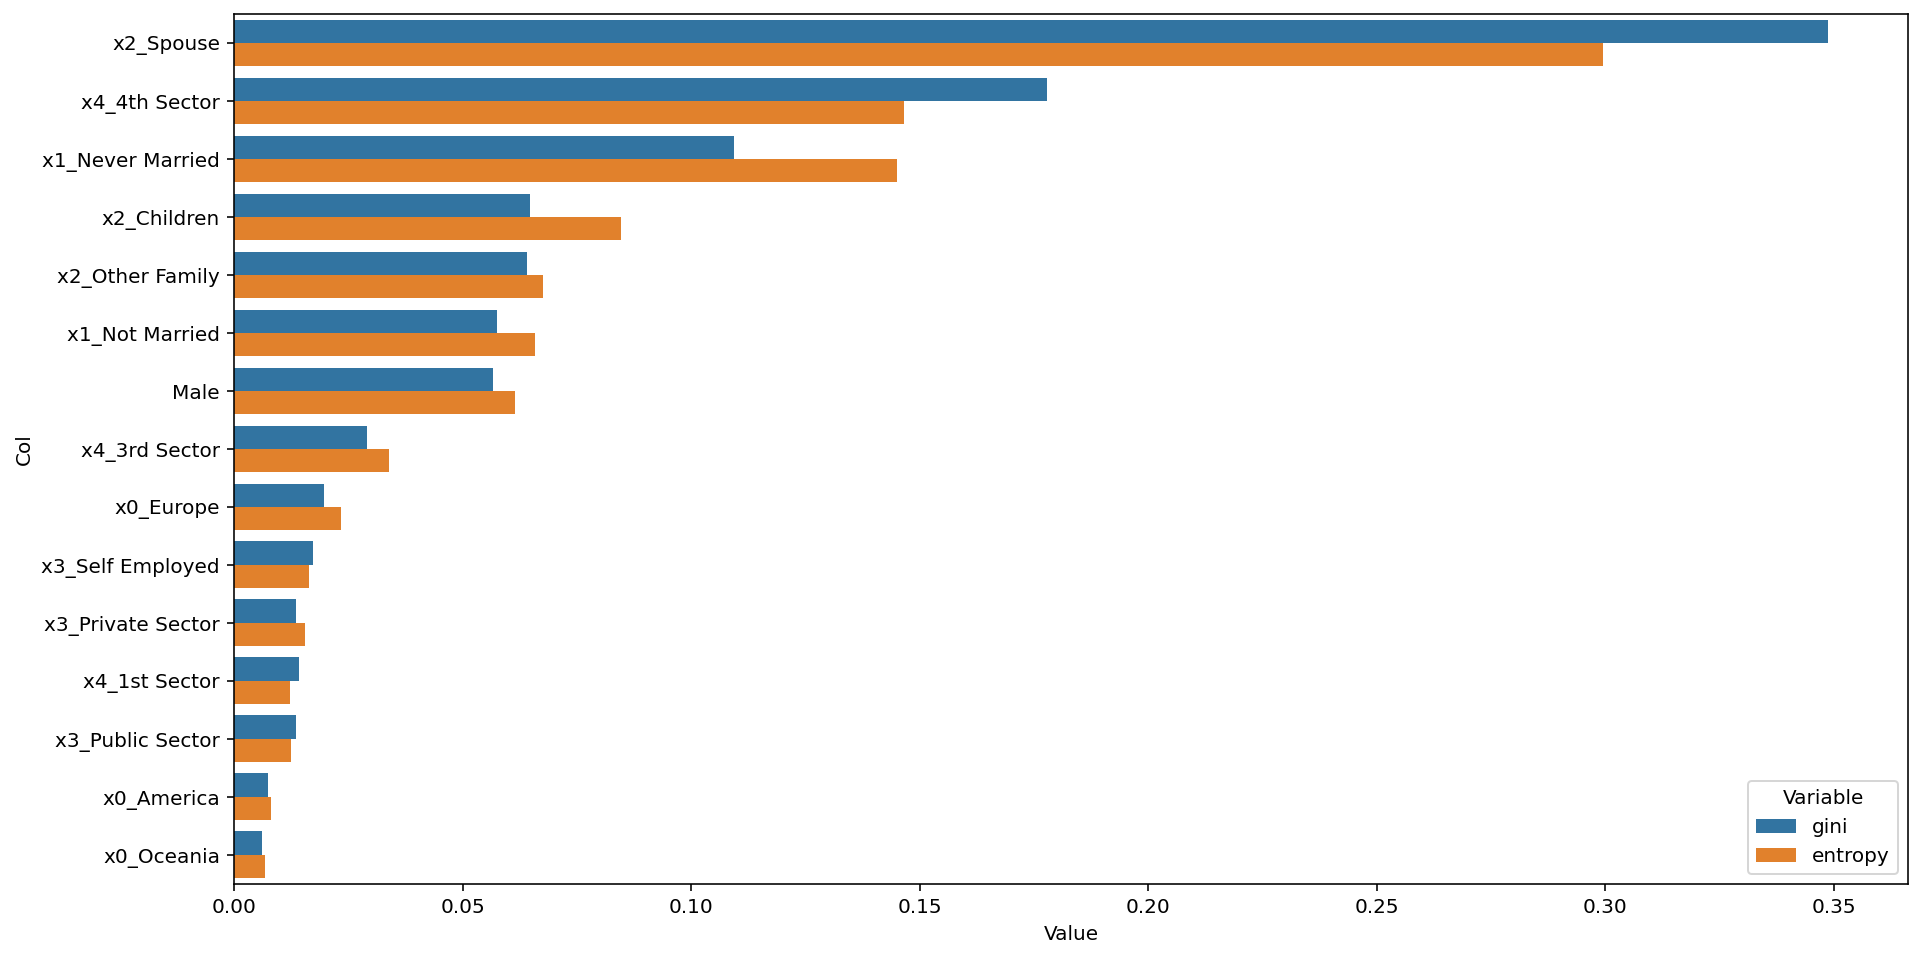

In [ ]:
zippy = pd.DataFrame(zip(gini_importanceRF, entropy_importanceRF), columns = ['gini','entropy'])
zippy['col'] = X_train_Original[binary_original].columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

#### Random Forest Classifier - gini and entropy - numerical variables

In [ ]:
gini_importanceRF = RandomForestClassifier().fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train).feature_importances_
entropy_importanceRF = RandomForestClassifier(criterion='entropy').fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train).feature_importances_

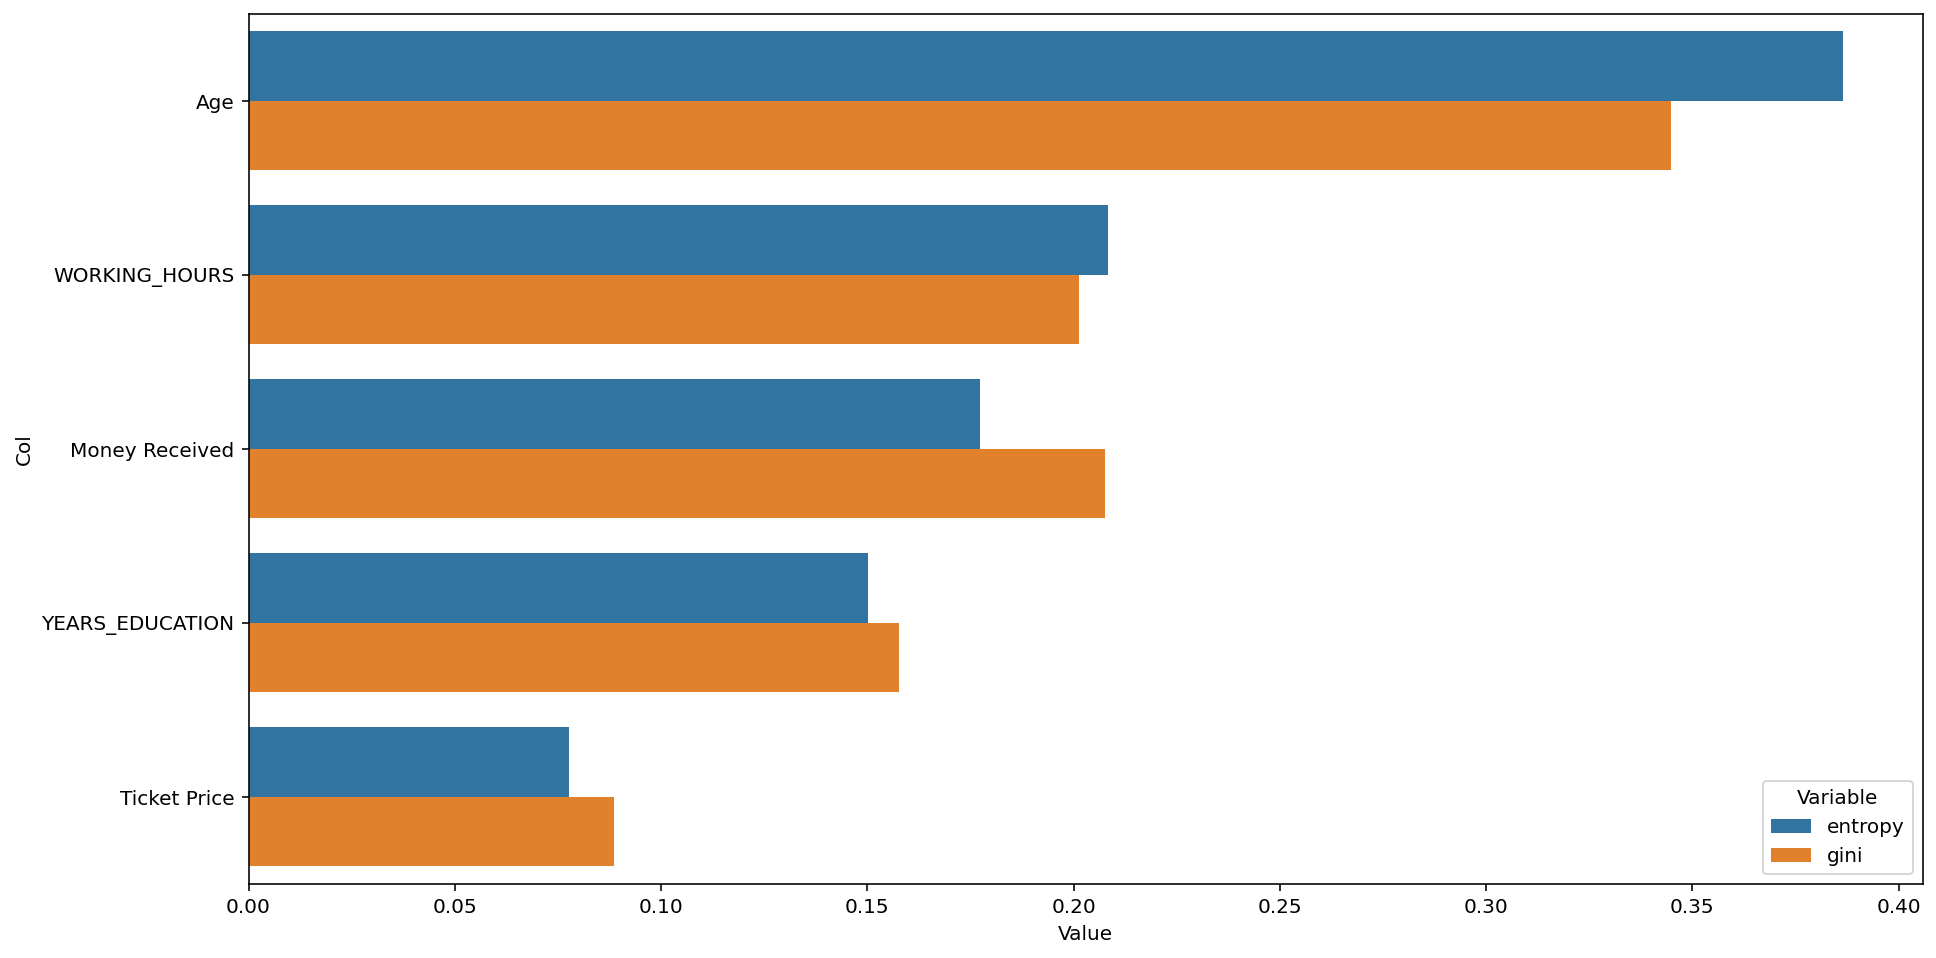

In [ ]:
zippy = pd.DataFrame(zip(gini_importanceRF, entropy_importanceRF), columns = ['gini','entropy'])
zippy['col'] = X_train_Original.drop(columns=X_train_Original[binary_original]).columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

### **Embbeded Methods**


#### Lasso - numerical variables

In [ ]:
#Feature selction trough Lasso
Lasso_Best_Alpha = LassoCV(cv = 10, random_state = 2)
Lasso_Best_Alpha = Lasso_Best_Alpha.fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train)

In [ ]:
Lasso_Best_Alpha.alpha_

1.7944099907951893e-05

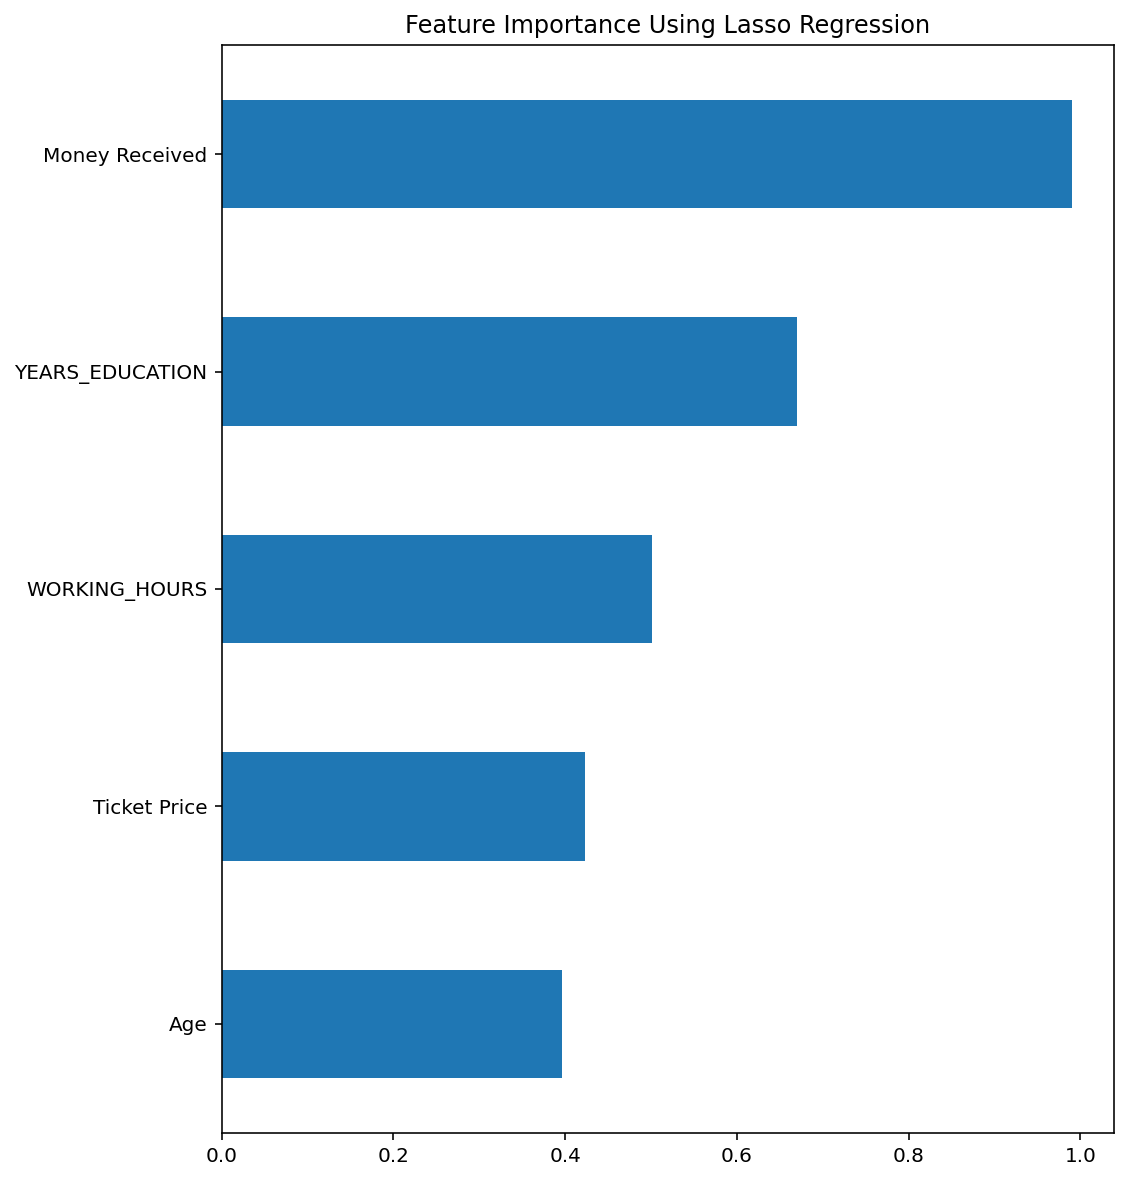

In [ ]:
Lasso_Reg = Lasso(alpha = Lasso_Best_Alpha.alpha_, random_state = 2)
Lasso_Reg.fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train)
coef_Lasso = pd.Series(Lasso_Reg.coef_, index = X_train_Original.drop(columns=X_train_Original[binary_original]).columns)
coef_Lasso.sort_values()
plot_importance(coef_Lasso, 'Lasso')

#### Lasso - binary variables

In [ ]:
#Feature selction trough Lasso
Lasso_Best_Alpha = LassoCV(cv = 10, random_state = 2)
Lasso_Best_Alpha = Lasso_Best_Alpha.fit(X_train_Original[binary_original], y_train)

In [ ]:
Lasso_Best_Alpha.alpha_

9.121661892968917e-05

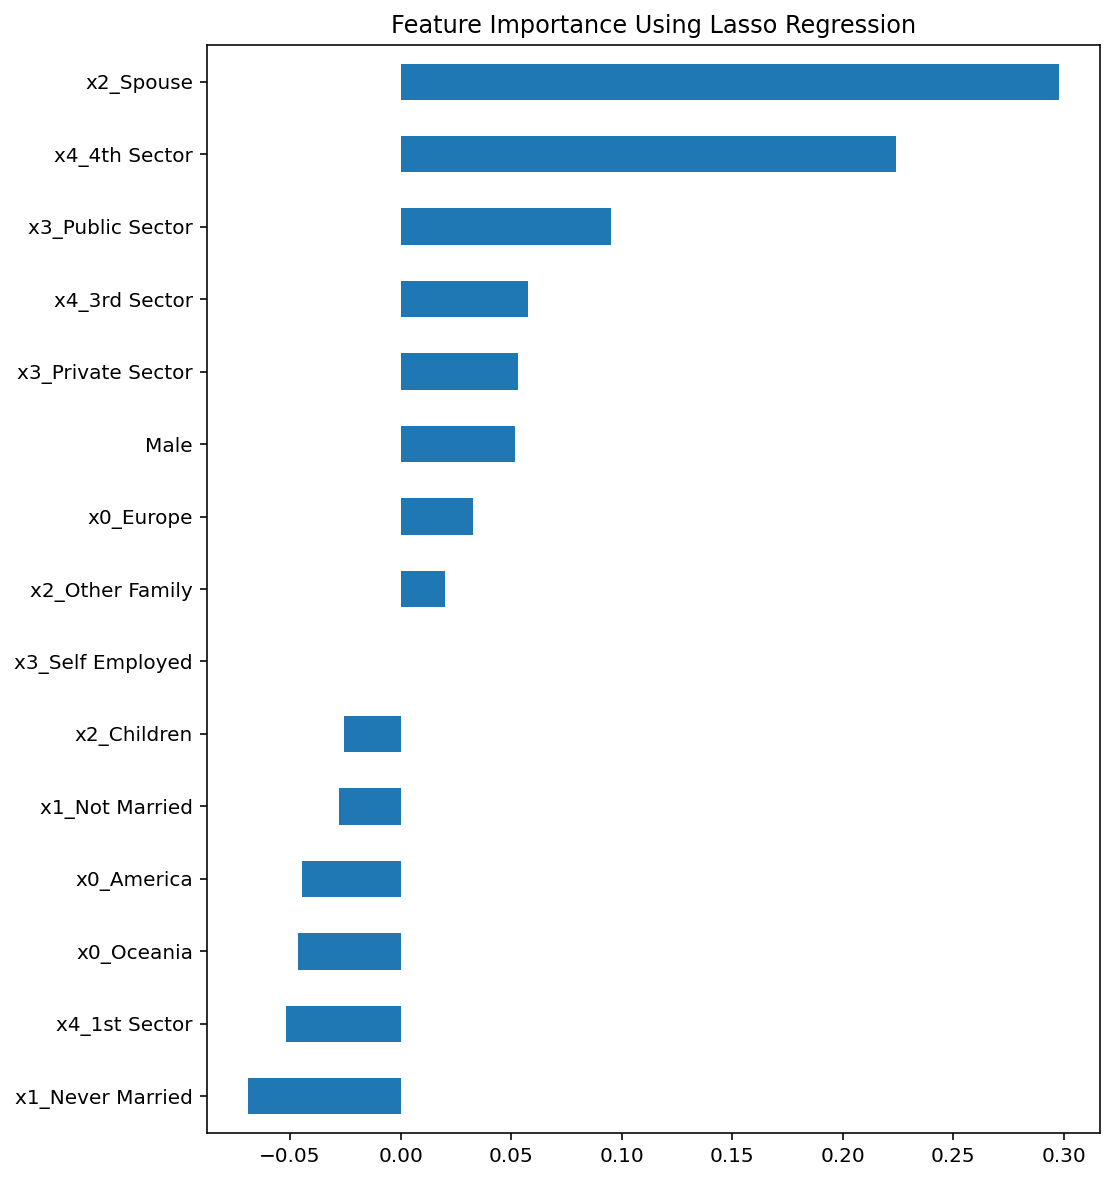

In [ ]:
Lasso_Reg = Lasso(alpha = Lasso_Best_Alpha.alpha_, random_state = 2)
Lasso_Reg.fit(X_train_Original[binary_original], y_train)
coef_Lasso = pd.Series(Lasso_Reg.coef_, index = X_train_Original[binary_original].columns)
coef_Lasso.sort_values()
plot_importance(coef_Lasso, 'Lasso')

#### Ridge - numerical variables

Best alpha for Ridge: 0.1


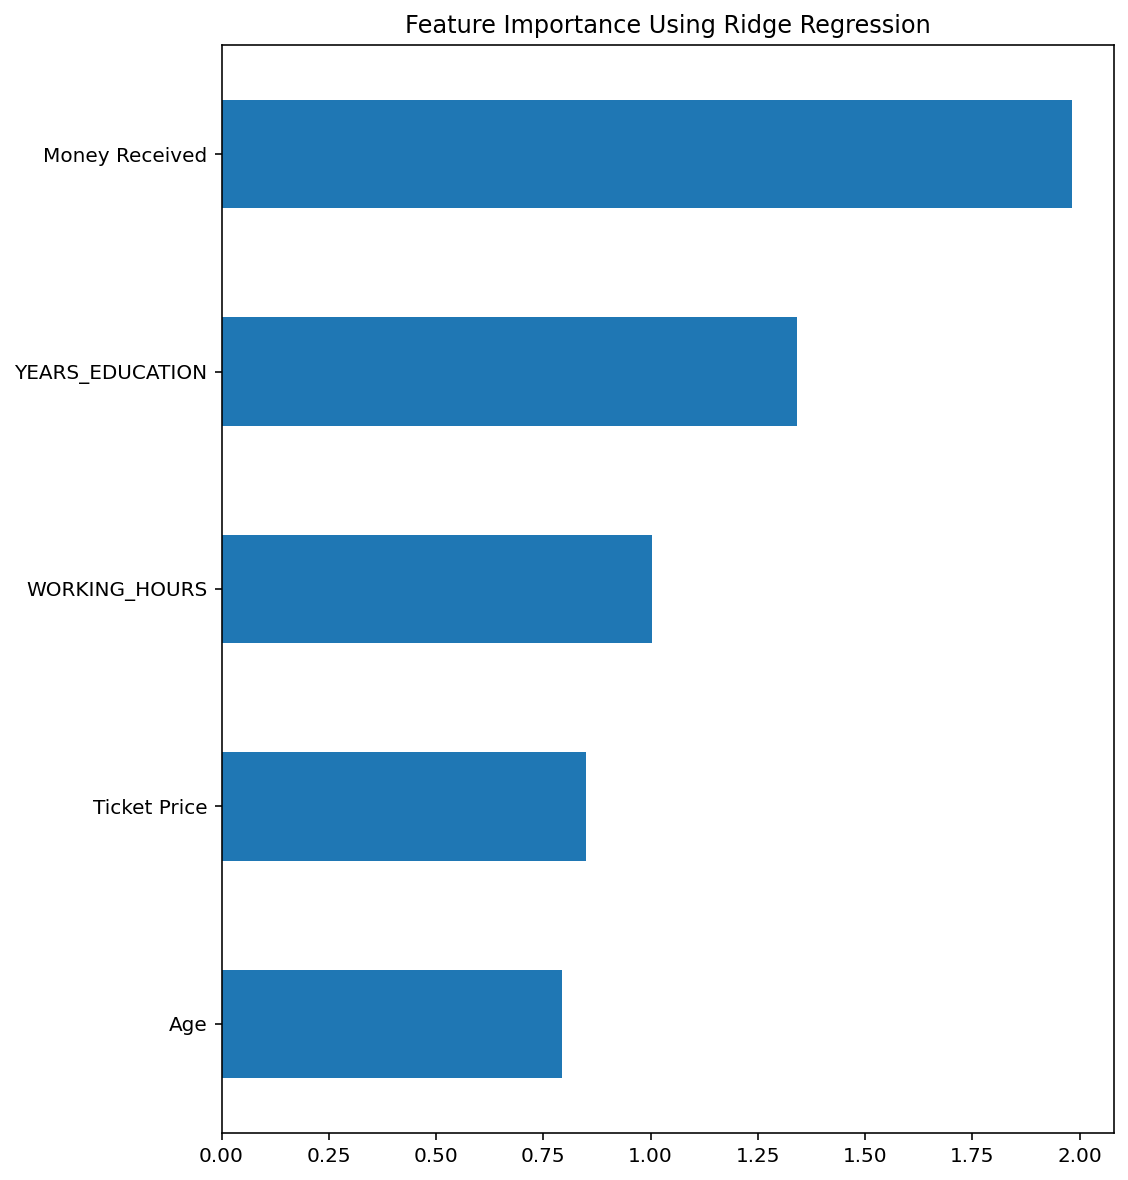

In [ ]:
ridge_alphas = np.linspace(0.1,100, num= 100)
Ridge_Best_Alpha = RidgeClassifierCV(alphas = ridge_alphas, cv = 10)
Ridge_Best_Alpha = Ridge_Best_Alpha.fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train)

print('Best alpha for Ridge:', Ridge_Best_Alpha.alpha_)
Ridge = RidgeClassifier(alpha = Ridge_Best_Alpha.alpha_, random_state = 2)
Ridge = Ridge.fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train)

coef_Ridge = pd.Series(Ridge.coef_[0], index = X_train_Original.drop(columns=X_train_Original[binary_original]).columns)
coef_Ridge.sort_values()
plot_importance(coef_Ridge, 'Ridge')

#### Ridge - binary variables

Best alpha for Ridge: 93.94545454545454


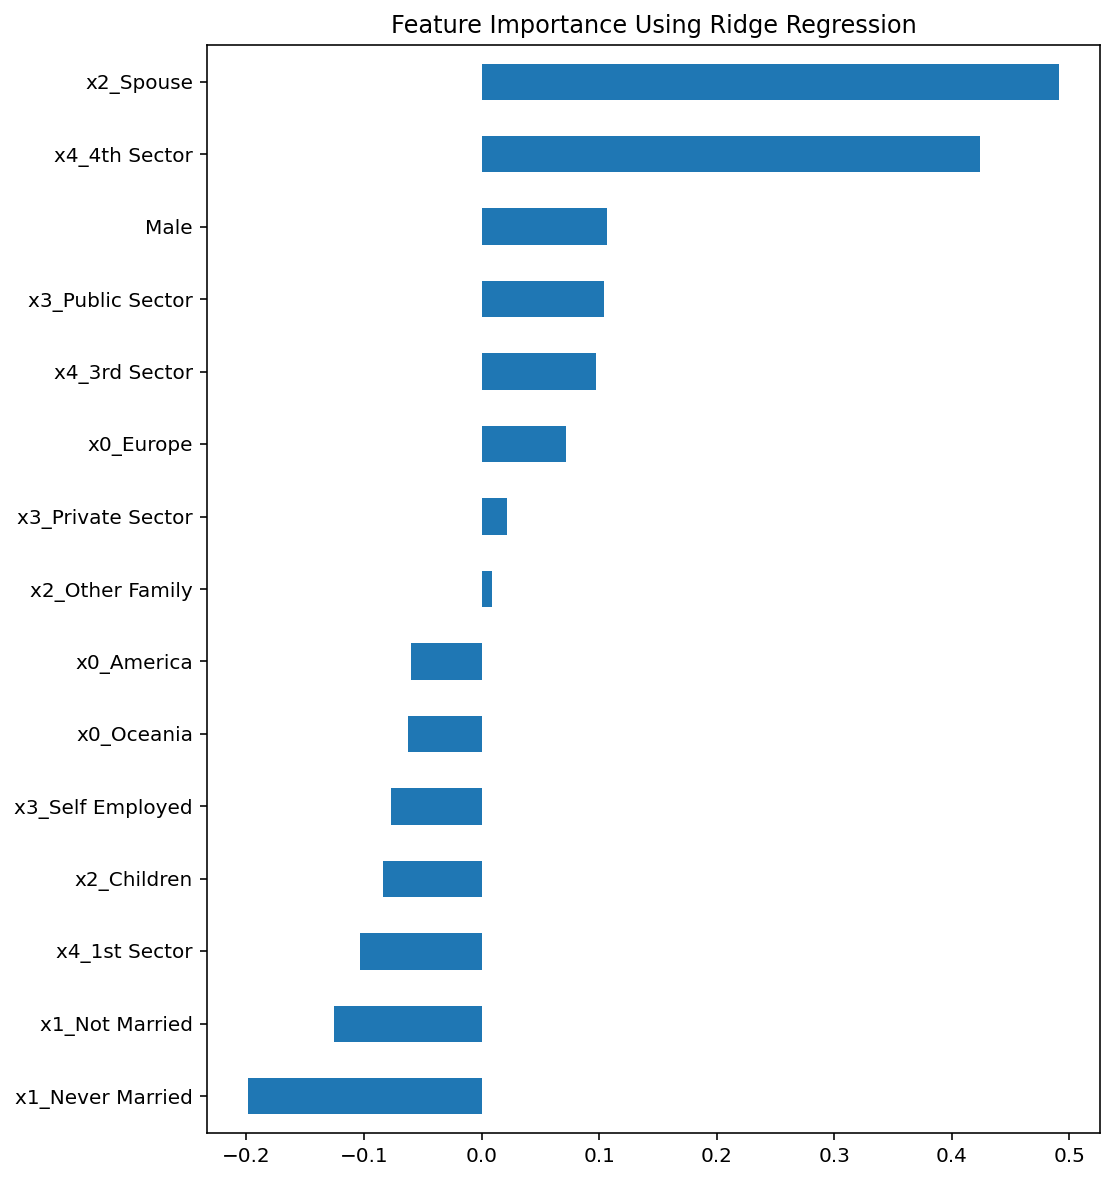

In [ ]:
ridge_alphas = np.linspace(0.1,100, num= 100)
Ridge_Best_Alpha = RidgeClassifierCV(alphas = ridge_alphas, cv = 10)
Ridge_Best_Alpha = Ridge_Best_Alpha.fit(X_train_Original[binary_original], y_train)

print('Best alpha for Ridge:', Ridge_Best_Alpha.alpha_)
Ridge = RidgeClassifier(alpha = Ridge_Best_Alpha.alpha_, random_state = 2)
Ridge = Ridge.fit(X_train_Original[binary_original], y_train)

coef_Ridge = pd.Series(Ridge.coef_[0], index = X_train_Original[binary_original].columns)
coef_Ridge.sort_values()
plot_importance(coef_Ridge, 'Ridge')

#### Elastic Net - numerical variables

In [ ]:
ElasticNet_Best_L1_Alpha = ElasticNetCV(l1_ratio = [.1, .5, .7, .9, .95, .99, 1], cv = 10, random_state = 2) 
ElasticNet_Best_L1_Alpha = ElasticNet_Best_L1_Alpha.fit(X_train_Original, y_train)

In [ ]:
print(ElasticNet_Best_L1_Alpha.l1_ratio_) #Best l1
print(ElasticNet_Best_L1_Alpha.alpha_)#Best alpha

1.0
9.121661892968917e-05


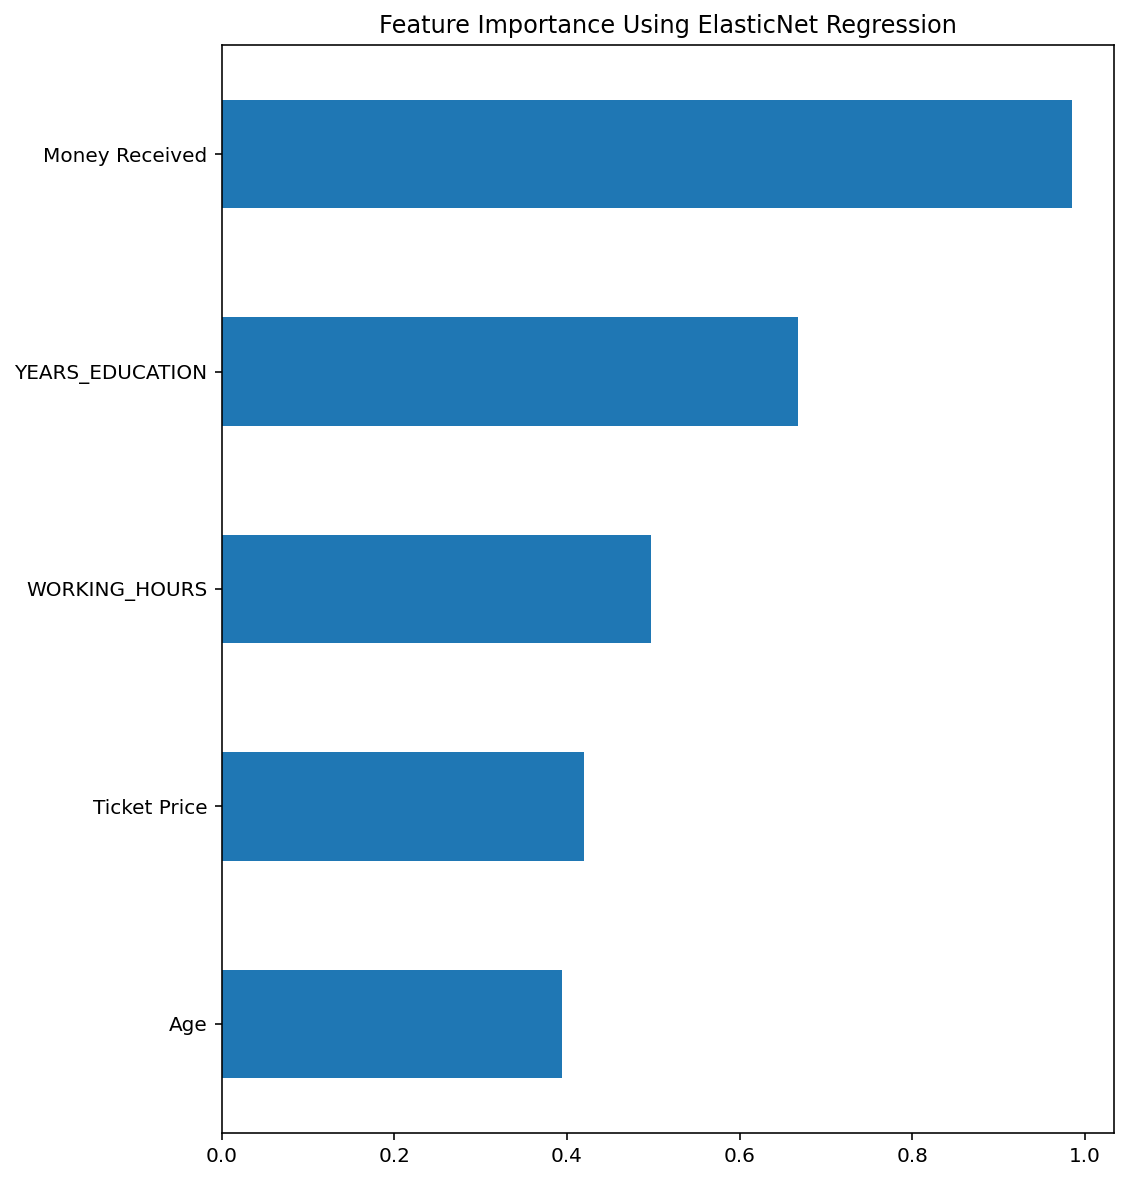

In [ ]:
ElasticNet_Reg = ElasticNet(l1_ratio = ElasticNet_Best_L1_Alpha.l1_ratio_, alpha = ElasticNet_Best_L1_Alpha.alpha_, random_state = 2)
ElasticNet_Reg.fit(X_train_Original.drop(columns=X_train_Original[binary_original]), y_train)
coef_ElasticNet = pd.Series(ElasticNet_Reg.coef_, index = X_train_Original.drop(columns=X_train_Original[binary_original]).columns)
coef_ElasticNet.sort_values()
plot_importance(coef_ElasticNet, 'ElasticNet')

#### Elastic Net - binary variables

In [ ]:
ElasticNet_Best_L1_Alpha = ElasticNetCV(l1_ratio = [0.0001,.1, .5, .7, .9, .95, .99, 1], cv = 10, random_state = 2) 
ElasticNet_Best_L1_Alpha = ElasticNet_Best_L1_Alpha.fit(X_train_Original[binary_original], y_train)

In [ ]:
print(ElasticNet_Best_L1_Alpha.l1_ratio_) #Best l1
print(ElasticNet_Best_L1_Alpha.alpha_)#Best alpha

0.5
0.00018243323785937837


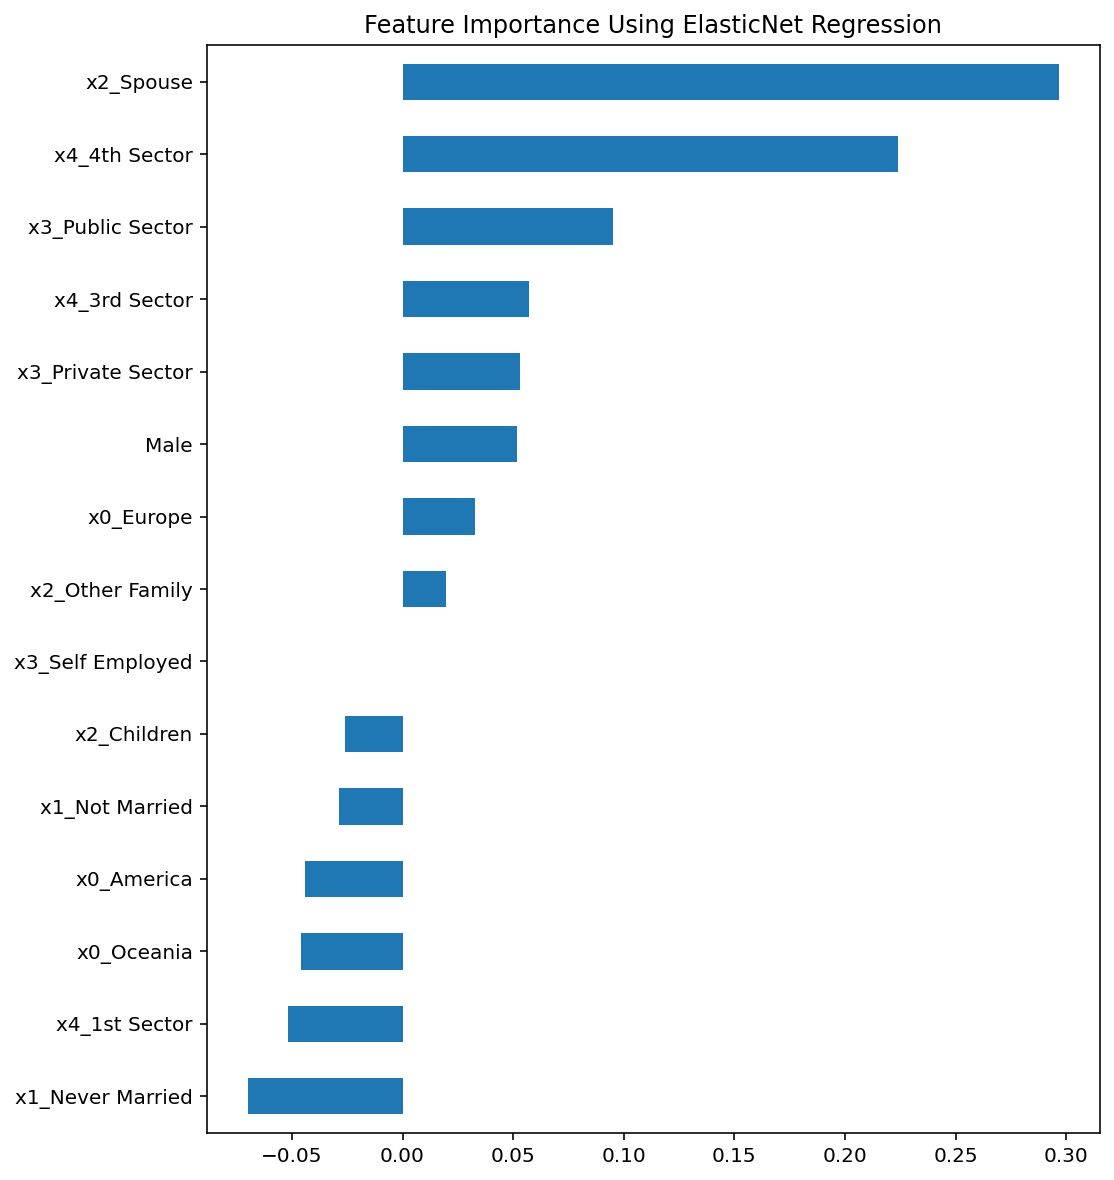

In [ ]:
ElasticNet_Reg = ElasticNet(l1_ratio = ElasticNet_Best_L1_Alpha.l1_ratio_, alpha = ElasticNet_Best_L1_Alpha.alpha_, random_state = 2)
ElasticNet_Reg.fit(X_train_Original[binary_original], y_train)
coef_ElasticNet = pd.Series(ElasticNet_Reg.coef_, index = X_train_Original[binary_original].columns)
coef_ElasticNet.sort_values()
plot_importance(coef_ElasticNet, 'ElasticNet')

# **Artificial Resampling**

The distribution of zeros and ones on the dependent variable is not balanced and so we decided to implement some artifical resampling techniques (oversampling and undersampling) in order to balance the target variable so that our models can predict in a correct way both of the values.

In [ ]:
X_train_AR = X_train_Original.copy()
new_binary = X_train_AR.drop(columns = ['YEARS_EDUCATION', 'WORKING_HOURS', 'Money Received', 'Ticket Price', 'Age']).columns.to_list()

### Random Oversampling

https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

 This technique generated duplicates of the minority class, what may lead to overfitting.

In [ ]:
RO = RandomOverSampler(sampling_strategy='minority', random_state=15)
X_RO, y_RO = RO.fit_resample(X_train_AR, y_train)

### Synthetic Minority Oversampling Technique (SMOTE)

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

Here we take a subset of data from the minority class and create new similar instances are. This technique doesn't lead to overfitting as random oversampling does, but it doesn't consider the neighbors from the other classes. This may cause some overlapping of classes and introduce some noise to our data.

In [ ]:
SMOTE = SMOTE(sampling_strategy='minority', random_state=15)
X_SMOTE, y_SMOTE = SMOTE.fit_resample(X_train_AR, y_train)

In [ ]:
for i in new_binary:
    X_SMOTE[i] = np.round(X_SMOTE[i])

### Adaptive Synthetic Oversampling (ADASYN)

https://towardsdatascience.com/adasyn-adaptive-synthetic-sampling-method-for-imbalanced-data-602a3673ba16

This technique is pretty similar to the previous one. The difference is that after creating similar instances it adds a random small value. This way, the new instances also possess an additional variance component than their parent instance.

In [ ]:
ADASYN = ADASYN(sampling_strategy='minority', random_state=15)
X_ADASYN, y_ADASYN = ADASYN.fit_resample(X_train_AR, y_train)

In [ ]:
for i in new_binary:
    X_ADASYN[i] = np.round(X_ADASYN[i])

# **Simpler Models**

## **Some Extra Variable Combinations**

In [ ]:
X_train_FirstTry = X_train_Original.drop(columns = ['x0_Oceania', 'x0_America', 'x1_Not Married', 'x3_Private Sector', 'x4_2nd Sector'])

X_train_MTB_FirstTry = X_train_MTB.drop(columns = ['x0_Oceania', 'x0_America', 'x1_Not Married', 'x3_Private Sector', 'x4_2nd Sector'])

X_train_SecondTry = X_train_Original[['Money Received', 'YEARS_EDUCATION', 'Ticket Price', 'WORKING_HOURS', 'Age', 'x4_4th Sector', 'x2_Spouse', 'x4_1st Sector', 'x2_Children', 'x2_Other Family', 'Male', 'x3_Private Sector']]

X_train_MT_SecondTry = X_train_MT[['Money_Ticket_Binary', 'YEARS_EDUCATION', 'WORKING_HOURS', 'Age', 'x4_4th Sector', 'x2_Spouse', 'x4_1st Sector', 'x2_Children', 'x2_Other Family', 'Male', 'x3_Private Sector']]

X_train_ThirdTry = X_train_Original[['Money Received', 'YEARS_EDUCATION', 'Ticket Price', 'WORKING_HOURS', 'x4_4th Sector', 'x2_Spouse']]

X_train_V2_SecondTry = X_train_Original

In [ ]:
X_val_FirstTry = X_val_Original[X_train_FirstTry.columns.to_list()]

X_val_MTB_FirstTry = X_val_MTB[X_train_MTB_FirstTry.columns.to_list()]

X_val_SecondTry = X_val_Original[X_train_SecondTry.columns.to_list()]

X_val_MT_SecondTry = X_val_MT[X_train_MT_SecondTry.columns.to_list()]

X_val_ThirdTry = X_val_Original[X_train_ThirdTry.columns.to_list()]

X_val_V2_SecondTry = X_val_Original[X_train_V2_SecondTry.columns.to_list()]

## Logistic Regression

In [114]:
log_model = LogisticRegression(random_state=15).fit(X_train_Original,y_train)
metrics(y_train ,log_model.predict(X_train_Original) , y_val, log_model.predict(X_val_Original))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     10160
           1       0.71      0.53      0.60      2968

    accuracy                           0.84     13128
   macro avg       0.79      0.73      0.75     13128
weighted avg       0.83      0.84      0.84     13128

[[9526  634]
 [1409 1559]]
F1-score, micro:  0.8443784277879341
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

## Gaussian Naive Bayes

On yet another simple predictive model, we will make exactly the same approach as the one we did on the Logistic Regression.

As so, we will then use the model that does not include the binary variables that we created that eventually may bring more value to our model:
 
Train:0.7576934795856185
Validation:0.756398537477148

Using the second dataset (X_train_MTB), that contains the binary variables of the money-related variables, the models that contained the exclusively the variable Money_Ticket_Binary (X_train_MT), achieving the following results
we didnt get any better results. On the last step, we ran the again the model with exclusively the variable MONEY_TICKET (X_train_MT2) but didn't get any good results either

What differs these models from the Logistic Regression ones is that the prediction of FP is done more accurately!

We then tried to make some Artificial Resampling to hinder the problem with the FN, but there seemed to be an evidence of overfit in almost every model.
We will then stick with the first step, that used the dataset X_train_Original

modelNB = GaussianNB()
modelNB.fit(X = X_train_Original, y = y_train)
metrics(y_train ,modelNB.predict(X_train_Original) , y_val,modelNB.predict(X_val_Original))

In [116]:
X_train_RC = X_train_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy() #, 'x4_2nd Sector'
X_val_RC = X_val_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()


modelNB = GaussianNB().fit(X = X_train_RC, y = y_train)
metrics(y_train ,modelNB.predict(X_train_RC) , y_val, modelNB.predict(X_val_RC))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     10160
           1       0.63      0.56      0.60      2968

    accuracy                           0.83     13128
   macro avg       0.76      0.73      0.74     13128
weighted avg       0.82      0.83      0.82     13128

[[9199  961]
 [1298 1670]]
F1-score, micro:  0.8279250457038391
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

## Decision Trees

In order to test mutiple models, decision trees were also tested.
These were first built by letting the tree go untill its last leafs without any constraints, this causes a lot of overfitting for the test data but it can help because we can tell the average maimum depth of the tree.

After this we can start reparemetrizing the tree in order to reduce the overfitting, this includes the max depth of the tree the criterion, the number of samples required to split the data the minimum weight of each leaf.

 As this was a very time consuming process we decided to run a grid search , setting the maximum depth of the tree as 50 , trying both the gini and entreopy  criterion, trying the best and random splitter, using an interval from 2 to 50 for the minimum samples to split a branch, using an interval from 1 to 20 for the minum number of samples a leaf should have and using 5 values (0.01,0.05,0.1,0.15,0.2) for the minimum weight of each leaf.

After finishing the grisearch the best parameters that were found for this tree were a maximum depth of 8 , the gini criterion , the ‘best’ splitter, 2 minimum samples to split a tree , 1 as the minimum samples a leaf could have  and 0.01 as the minimum weight of a leaf.

This gave us a decision tree classifier with a score of 0.851 on the train set and a score of 0.85 on the validation set.

After several tries we were able to reduce the overfitting and proceeded to other simple models

In [118]:
# model = DecisionTreeClassifier()

# #We will use adam because (...)

# #Parametros so para adam
# parameter_space_MLP_adam_DT = {
#     'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': [int(x) for x in np.round(np.linspace(1,50,50))],
#     'min_samples_split':[int(x) for x in np.round(np.linspace(2,50,50))],
#     'min_samples_leaf':[int(x) for x in np.round(np.linspace(1,20,2))],
#     'min_weight_fraction_leaf':[0.01,0.05,0.1,0.15,0.2],
#     'random_state':[15]
# }

# MLP_GS_adam_DT = GridSearchCV(model, parameter_space_MLP_adam_DT, scoring='f1_micro', n_jobs = -1, cv=10)
# MLP_GS_adam_DT.fit(X_train_Original, y_train)
# MLP_GS_adam_DT.best_params_

dt_gini = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=8, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.01, random_state=15)
dt_gini.fit(X_train_RC, y_train)
print('The defined three has a depth of ' + str(dt_gini.get_depth()) + ', ' + str(dt_gini.tree_.node_count) + ' nodes and a total of ' + str(dt_gini.get_n_leaves()) + ' leaves.')
metrics(y_train ,dt_gini.predict(X_train_RC) , y_val,dt_gini.predict(X_val_RC))

The defined three has a depth of 8, 89 nodes and a total of 45 leaves.
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     10160
           1       0.75      0.53      0.62      2968

    accuracy                           0.85     13128
   macro avg       0.81      0.74      0.76     13128
weighted avg       0.85      0.85      0.84     13128

[[9646  514]
 [1408 1560]]
F1-score, micro:  0.8535953686776356
___________________________________________________________________________________________________________
                                                VALIDATION                                                

## Instance Based Learning

Instance Based Learning is a family of learning algorithms that compare new problem instances with instances seen in training. When making predictions with these models for a new instance, they compute distances between the instance it is trying to predict and the training instances to get to a decision. With these models we have the riskof overfitting.
K Nearest Neighbors and K Nearest Centroids are examples of Instance Based Learning models.

### K Nearest Neighbors

We decided to test the K Nearest Neighbors model also. We started by running a grid search , setting the maximum number of neighbors to 31, trying the euclidean, cosine, manhattan and minkowski metrics, trying the uniform and distance weights, and also trying also the auto, ball_tree, kd_tree and brute algorithms.

After finishing the grisearch the best parameters that were found for the model were the ball_tree algorithm, with the manhattan metric, 18 neigbors and the uniform weights.

This gave us a model with a score of 0.85 on the train set aand 0.84 on the validation set.

With artificial resampling the scores were worse, we could clearly see a situation of overfitting. After several tries with different datasets, we reduced overfitting.

In [124]:
#k = 5
#cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=15)

knn_clf = KNeighborsClassifier()

# #knn_parameters = {'n_neighbors' : np.arange(1,31,1),
#                    'metric' : ['euclidean', 'cosine', 'manhattan', 'minkowski'],
#                    'weights' : ['uniform', 'distance'],
#                    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

#knn_grid = GridSearchCV(estimator=knn_clf, param_grid=knn_parameters, cv=cv, scoring='f1_micro', verbose=1, n_jobs=-1)
#knn_grid.fit(Dataset2, y_train)
#knn_grid.best_params_

#{'algorithm': 'ball_tree',
# 'metric': 'manhattan',
# 'n_neighbors': 18,
# 'weights': 'uniform'}

knn = KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=18, weights='uniform').fit(X_train_RC, y_train)
metrics(y_train ,modelNB.predict(X_train_RC) , y_val,modelNB.predict(X_val_RC))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     10160
           1       0.63      0.56      0.60      2968

    accuracy                           0.83     13128
   macro avg       0.76      0.73      0.74     13128
weighted avg       0.82      0.83      0.82     13128

[[9199  961]
 [1298 1670]]
F1-score, micro:  0.8279250457038391
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

### K Nearest Centroid

We decided to test the K Nearest Centroids model also. We started by running a grid search, trying the euclidean, cosine, and manhattan metrics.

After finishing the grisearch the best parameter that were found for the model was the manhattan metric.

This gave us a model with a score of 0.745 on the train set and o.756 on the validation set.

With artificial resampling the scores were worse, we could see a situation of overfitting. After several tries with different datasets, we reduced overfitting.

In [125]:
#k = 5
#cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=15)

#knc_clf = NearestCentroid()
#knc_parameters = {'metric' : ['euclidean', 'cosine', 'manhattan']}
#knc_grid = GridSearchCV(estimator=knc_clf, param_grid=knc_parameters, cv=cv, scoring='f1_micro', verbose=1, n_jobs=-1)
#knc_grid.fit(Dataset3, y_train)
#knc_grid.best_params_

knc = NearestCentroid(metric='manhattan').fit(X_train_RC, y_train)
metrics(y_train ,modelNB.predict(X_train_RC) , y_val,modelNB.predict(X_val_RC))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     10160
           1       0.63      0.56      0.60      2968

    accuracy                           0.83     13128
   macro avg       0.76      0.73      0.74     13128
weighted avg       0.82      0.83      0.82     13128

[[9199  961]
 [1298 1670]]
F1-score, micro:  0.8279250457038391
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

# **Elaborate Models**

## **Support Vector Machines**

We will use the dataset trial for the trainng of SVM Models because so far its the one that has given us the best results

**rbf kernel**

For the SVM models, one of the most important hyperparameters is the kernel. As so, we decided to conduct a gridsearch on this parameter.
These were the results:
rbf: {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
With these scores:
Train:0.858622790981109
Validation:0.8546617915904936

As the grid search gives us the best results for the train dataset, we will have to adjust to make sure the model is fit.
With the results above, we can see that there is a slight overfit, and so we will change the C hyperparameter to reduce this.
With C=1, the default parameter, we got to the following scores: 0.837827544180378, 0.8439213893967094
Not so good is it? 
Let's change the approach and use C=500, as we know that reducing C, the overfit will also reduce. We got to this scores: 0.8583180987202925, 0.855575868372943
With C=100, we got to a really good balanced solution 0.8557282145033516, 0.8553473491773309


*poly kernel*
Then we decided to use the poly kernel, and did a kind of grid search on our own. We started by using the degree parameter as default,
and C= 1000. We got super overfited resultds.
Then we tried to use the C also as default, and we saw no evidence of overfit.
Let's now test a higher degree. 5, for example. With the degree = 5, the results got better. 
Then we change C again, and there was evidence of overfit:  0.8547379646556977 ,0.8544332723948812
When the degree became 6, the overfitting started again, and with degree = 4 we got to the best results:(0.8526812918951858, 0.8530621572212066)!

In [128]:
modelSVM = SVC(kernel='poly')
modelSVM.fit(X_train_Original,y_train)
metrics(y_train,modelSVM.predict(X_train_Original) , y_val,modelSVM.predict(X_val_Original))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     10160
           1       0.76      0.51      0.61      2968

    accuracy                           0.85     13128
   macro avg       0.82      0.73      0.76     13128
weighted avg       0.84      0.85      0.84     13128

[[9688  472]
 [1460 1508]]
F1-score, micro:  0.8528336380255942
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

## **Multilayer Perceptron**

We started experimenting with neural networks fairly soon in our project and when we tried the first grid search we still had a fairly simple feature selection, and so the variables we choose weren't exactly the best ones and the same thing could be said for the parameters we tried, we were very "conservetive" on the different combinations and definatively not optimal, but none the less it at least gave us a baseline model with an f1-micro score of 0.85 on train and 0.86 on validation.

We tried to train the model with some transformed variables we had at the time, but we weren't abble to improve. Changing a bit the combination of variables allowed us to improve sligthly the model and we also started experimenting with some values of hyperparamters that didn't follow the usual rules of thumb. We eventually got to a model (MLPClassifier(hidden_layer_sizes = (12,20), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, max_iter = 1000,  alpha=0.00001, batch_size=50, random_state = 15)) with an f1-micro score of 0.857 for train and 0.86 for validation. Since we weren't in the presence of overfiting and we were just doing individual changes to the model, without cross validation, and seing what got better or worse we decided to perform two grid searches with cross validation of 10 and this time specifying in the grid search what was the score to maximize, f1-micro. So we tried different combinations of hyperparamters both for the solver as adam and for the solver as sgd. We divided the grid searches since with the solver as adam there is no need for the parameter learning rate.

Out of the results of both grid searches the best one of the models was the one with the hyperparameter of the second grid search(MLPClassifier(hidden_layer_sizes = (200), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, batch_size=600, max_iter = 1000,  alpha=0.01, random_state = 15)), wich gave an f1-micro score of 0.862 for both train and validation. 

So we improved the model sligthly, however we encountered the problem of the model having great difficulty predicting ones, so we tried to train it with the oversampled datasets and also with the transformed variables we had, but either the model remained fairly equal or we overfited.

So we started to reduce the number of variables, based on our feature selection ranking, and adapting the hyperparameters bit by bit untill we eventually converged to an optimal number of variables and a new model. This was achieved by removing the worst ten binary variables we had. We also tried to remove more variables, to remove the worst numeric variable or to use the transformed variables we had but unfortunently the model didn't improve further.

And so we reached our final model (MLPClassifier(hidden_layer_sizes = (50,125,10), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, batch_size=600, max_iter = 1000,  alpha=0.00001, random_state = 15)
) wich had an f1-micro score of 0.863 for train and validation, we were abble to very slightly improve our model however we had to greatly increase its complexity.

We still prefered this one as our final MLP simply because it could predict ones sligthly better, for example, it had a recall of 0.59 for validation, while the previous had a recall of 0.53

We also tried training this model with the oversamplings we did, without removing outliers or with some of the transformed variables we created, but it didn't improve. If we used standard scaling, instead of min-max the model overfited, with an f1-micro score of 0.88 for train and 0.84 for validation and with the missing value imputation being done with a neural network it remained the same as before.

In [ ]:
#First MLP Grid Search

#X_train_FirstTry = X_train_Original.drop(columns = ['x0_Oceania', 'x0_America', 'x1_Not Married', 'x3_Private Sector', 'x4_2nd Sector'])
#X_val_FirstTry = X_val_Original[X_train_FirstTry.columns.to_list()]

#model = MLPClassifier()
#parameter_space = {
#    'hidden_layer_sizes': [(5), (6), (7), (8), (9), (10), (11), (12), (13), (14), (5,5), (6,6), (7,7), (8,8), (9,9), (10,10), (11,11), (12,12), (13,13), (14,14)],
#    'activation': ['tanh', 'relu', 'logistic'],
#    'solver': ['sgd', 'adam'],
#    'learning_rate_init': list(np.linspace(0.00001,0.1,5)),
#    'learning_rate': ['constant','adaptive']
#}
#First_GS = GridSearchCV(model, parameter_space, n_jobs = -1)
#First_GS.fit(X_train_FirstTry, y_train)
#First_GS.best_params_

#{'activation': 'tanh',
# 'hidden_layer_sizes': 9,
# 'learning_rate': 'constant',
# 'learning_rate_init': 0.025007500000000002,
# 'solver': 'adam'}

#Second MLP Grid Search

#model = MLPClassifier()

#parameter_space_MLP_adam = {
#    'hidden_layer_sizes': [(20,50),(12,20),(50,100),(20,20),(200),(100,200),(100),(200,100),(30,50),(35,60),(10,20),(50)],
#    'activation': ['tanh', 'relu', 'logistic'],
#    'solver': ['adam'],
#    'learning_rate_init': [0.1,0.01,0.001,0.0001],
#    'alpha':[0.1,0.01, 0.001, 0.0001,0.00001],
#    'batch_size':[200,600,1300],
#    'random_state':[15],
#    'max_iter':[1000]
#}

#MLP_GS_adam = GridSearchCV(model, parameter_space_MLP_adam, scoring='f1_micro', n_jobs = -1, cv=10)
#MLP_GS_adam.fit(X_train_Original, y_train)
#MLP_GS_adam.best_params_
###########################################################FALTA ISTO


#Third MLP Grid Search

#parameter_space_MLP_sgd = {
#    'hidden_layer_sizes': [(20,50),(12,20),(50,100),(20,20),(200),(100,200),(100),(200,100),(30,50),(35,60),(10,20),(50)],
#    'activation': ['tanh', 'relu', 'logistic'],
#    'solver': ['sgd'],
#    'learning_rate_init': [0.1,0.01,0.001,0.0001],
#    'learning_rate': ['constant','adaptive'],
#    'alpha':[0.1,0.01, 0.001, 0.0001,0.00001],
#    'batch_size':[200,600,1300],
#    'random_state':[15],
#    'max_iter':[1000]
#}

#MLP_GS_sgd = GridSearchCV(model, parameter_space_MLP_sgd, scoring='f1_micro', n_jobs = -1, cv=10)
#MLP_GS_sgd.fit(X_train_Original, y_train)
#MLP_GS_sgd.best_params_
###########################################################FALTA ISTO

X_train_RC = X_train_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy() #, 'x4_2nd Sector'
X_val_RC = X_val_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()

MLP_final = MLPClassifier(hidden_layer_sizes = (50,125,10), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, batch_size=600, max_iter = 1000,  alpha=0.00001, random_state = 15)

MLP_final.fit(X_train_RC, y_train)
metrics(y_train, MLP_final.predict(X_train_RC), y_val, MLP_final.predict(X_val_RC))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     10160
           1       0.77      0.56      0.65      2968

    accuracy                           0.86     13128
   macro avg       0.83      0.76      0.78     13128
weighted avg       0.86      0.86      0.85     13128

[[9666  494]
 [1310 1658]]
F1-score, micro:  0.8625837903717246
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

# **Ensembling**

## **Random Forests**

After analysing some results in the SVM and the MLP calssifier we pushed on with our research, this time using some ensembling models, startin with Random Forests.
These models are a more complex application of decision trees, that builds mutiple decision trees and then takes into consideration the mode of the splitting criterion that wsas found on these trees, this not only reduces the overfitting of the trees but also reduces the error due to bias, by combining several weaker models we can generate a more robust and stroger model.

Altough runnign a gridsearch was the first thing that came to mind when building these sort of models we learned the hard way that it was not a good option, since random forests generate large amounts of decision trees each iteration takes a longer time to run and to fir to the data, if we add the linear combinations that a gridsearch provides the amount of time and computing power needed would not only be inefecient but alsovery time and resouce consuming.

So instead we went with the more hands on approach of chagin the possible parameters of the trees and checking the changes it made to our scores.
First we started with a very simple model only using 150 estimators, so we could grasp if the error and overfitting indeed went down.

But as we expected the estimator overfitted and we got a score of 0.967 on the train set and a 0.84 on the validation set.

We trying changing the variables but that still led to overfitting, so we knew it wasnt the variables chosen.

Something had to be changed so we decided to look into other parameters, as we had already learned from the decision trees a very import parameter that reduces overfitting is the max depth of a tree, this should also be even more legitimate in the random forest estimator since if reducing dimensions in one tree was significant reducing the depth in 150 sould be even more!
We started with a max depth of 10, this was because of the conclusions that we reached with the decision trees, that with a maximum depth of 8 we could completely reduce overfitting, maybe the random forest could go a bit deeper in the trees. After fitting the data we got a way better score than before, 0.876 in the training set and 0.861 in the validation set, this means we are going in the correct direction, but some improvement could still be made.

We decided to increase the number of tree made (estimators) drasticaly to see the chages in our score. This however ddid not improve our score, so we decide to tstick to the route of small increments to see the chages that it had to our score.

Our second best improvement was made when chaged to a maximum depth of 8, using 800 estimators, using the gini criterion and using the auto parameter on the max features fuction, this gave us a score of 0.867 ont he train set and a score of 0.864 on the validation set.


In [ ]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [5,7,9,10,11,15,20]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [25,65,105,145,185,225]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1,5,10,25,50,100]
# # Method of selecting samples for training each tree
# bootstrap = [True]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# from sklearn.model_selection import RandomizedSearchCV
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier(random_state=42)
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = GridSearchCV(rf, random_grid, cv = 10 , n_jobs = -1, scoring = 'f1_micro')
# rf_random.fit(X_train_RC, y_train)
# rf_random.best_params_

# {'bootstrap': True,
#  'max_depth': 11,
#  'max_features': 'auto',
#  'min_samples_leaf': 1,
#  'min_samples_split': 25,
#  'n_estimators': 200}

modelRF = RandomForestClassifier(n_estimators=200,max_depth=11,max_features='auto',bootstrap=True,criterion='entropy',min_samples_leaf=1,min_samples_split=25,random_state=42)
modelRF.fit(X_train_RC, y_train)
metrics(y_train,modelRF.predict(X_train_RC) , y_val,modelRF.predict(X_val_RC))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     10160
           1       0.82      0.54      0.65      2968

    accuracy                           0.87     13128
   macro avg       0.85      0.75      0.78     13128
weighted avg       0.86      0.87      0.86     13128

[[9805  355]
 [1375 1593]]
F1-score, micro:  0.8682205971968312
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

## **Bagging**

### **Bagging Logistic Regression**

The approach followed to use Bagging Techniques in our dataset was to select the best simple models that we had and try to bagg them in order to find if it did indeed give us better results. 

As so, we will use Bagging methods in Logistic Regression and on Neural Networks. 

As always, we started by using the original dataset (X_train_Original), and using some techniques to find out if the parameters on the Bagging Classifier did improve.

The results we got were even worst than those on the simple Logistic Regression modelling.

  `X_train_Original` :
  - Train: 0.8339427178549664
  - Validation: 0.8311243144424132

Afterwards, we decided to use the X_train_RC dataset, which has been given us better results, and the results did not improve either compared to simpler models. After seeing these results, we searched a little more about it and we connected the dots: **as Bagging is usually useful to avoid overfitting, and Linear Regressions are not prone to overfit, it makes sense the results did not improve and as so using bagging on logistic regression might not be the smartest strategy**



In [ ]:
modelDT = LogisticRegression(random_state=15)
bagging_DT = BaggingClassifier(base_estimator = modelDT, random_state = 5 , bootstrap = False,max_samples = 0.5,max_features = 0.5)
bagging_DT.fit(X_train_Original, y_train)
metrics(y_train,bagging_DT.predict(X_train_Original) , y_val,bagging_DT.predict(X_val_Original))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.97      0.90     10160
           1       0.79      0.36      0.49      2968

    accuracy                           0.83     13128
   macro avg       0.82      0.67      0.70     13128
weighted avg       0.83      0.83      0.81     13128

[[9885  275]
 [1905 1063]]
F1-score, micro:  0.8339427178549664
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

### **Bagging NN**

After analysing the results of the Neural Networks we decided to use an ensembling model on the best ones.

We tried the bagging with different datasets that contained different variables each.

The final model had a score of 0.861 on the train set as well as on the validation set.

In [ ]:
Dataset2 = X_train_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe']]
DatasetVal2 = X_val_Original[['Money Received','Age', 'WORKING_HOURS', 'YEARS_EDUCATION', 'Ticket Price',  'x2_Spouse', 'x2_Children', 'x4_4th Sector', 'x0_Oceania', 'x4_1st Sector', 'x0_America', 'x1_Never Married',  'x2_Other Family', 'Male', 'x1_Not Married', 'x3_Public Sector', 'x0_Europe']]
#Train:0.8613650213284583
#Validation:0.8612888482632541

In [ ]:
GS_adam_NN = MLPClassifier(hidden_layer_sizes = (200), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, batch_size=600, max_iter = 1000,  alpha=0.01, random_state = 15)

In [ ]:
bagging_SVM = BaggingClassifier(base_estimator = GS_adam_NN, random_state = 5)

In [ ]:
bagging_SVM.fit(X = Dataset2, y = y_train)

BaggingClassifier(base_estimator=MLPClassifier(alpha=0.01, batch_size=600,
                                               hidden_layer_sizes=200,
                                               learning_rate_init=0.01,
                                               max_iter=1000, random_state=15),
                  random_state=5)

In [ ]:
print(f1_score(y_train, bagging_SVM.predict(Dataset2), average = 'micro'))
print(f1_score(y_val, bagging_SVM.predict(DatasetVal2), average = 'micro'))

0.8615173674588665
0.8612888482632541


### **Bagging KNN**

In [129]:
modelKNN = KNeighborsClassifier(metric='manhattan', n_neighbors=18, weights='uniform')
bagging_KNN = BaggingClassifier(base_estimator = modelKNN, random_state = 5).fit(X = X_train_RC, y = y_train)
metrics(y_train,bagging_KNN.predict(X_train_RC) , y_val,bagging_KNN.predict(X_val_RC))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     10160
           1       0.75      0.58      0.65      2968

    accuracy                           0.86     13128
   macro avg       0.82      0.76      0.78     13128
weighted avg       0.85      0.86      0.85     13128

[[9594  566]
 [1260 1708]]
F1-score, micro:  0.8609079829372334
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

## **Adaboost**

Since AdaBoost doesn't have a lot of hyperparameters to tune, at least in its sklearn implementation, we jumped imideatly to tuning its hyperparameters instead of first estimating a base model, with for example the default parameters, to have a baseline.

At first we started tuning the number of estimators and the learning rate, keeping the base estimator and the algorithm as default, a decision tree classifier with a max deph of one and SAMME.R respectively, and obviously a fixed random_state. We choose to start tuning these hyperparameters as we though they were the easiest to first estimate and the ones that would possible have a bigger impact. We tried 13 different number of estimators [10,50,100,500,1000,1500,2000,2500,3000,3500,4000,4500,5000] and 5 different learning rates [1,0.1,0.01,0.001,0.0001].

We used the combination of variables reached trough the feature selection that, on some other models, have given us the best results and a Grid Search with a cross validation of 10 and as scoring of the best parameters the measure we are trying to maximize, f1-micro. We reached an algorithm with a training f1-score with a micro average of 0.868 and validation of 0.872.

Then, keeping the previously estimated hyperparameters fixed, we started to experiment with different decision tree classifiers max dephs. The best solution was the one previously defined, meaning a max_deph of one. 

We also tried with the algorith SAMME, but both the train f1-score and the validation f1-score decreased, to 0.859 and 0.863 respectively.

And so we reached our final AdaBoost model with 2500 estimators, a learning rate of 1 and as base estimator a Decision Tree Classifier with a max deph of one. Just like most of our other models it also shows some dificulties predicting ones, but dispite that, and having into account the measure in which our models will be evaluated, it is quite a good contender for the final model with again, a train f1-score of 0.868 and validation of 0.872.

Just like with our other models we also tried removing less or more variables, without removing outliers, using our transformed variants of some variables or using the different oversampling techniques we tried to implement, but the results always got worse.

With standard scaling, instead of min max, the model was exactly the same.

In [ ]:
#AdaBoost first GridSearch
#model = AdaBoostClassifier()
#
#parameter_space_Ada = {
#     'n_estimators': [10,50,100,500,1000,1500,2000,2500,3000,3500,4000,4500,5000],
#    'learning_rate': [1,0.1,0.01,0.001,0.0001],
#    'random_state':[15],
#}

#AdaBoost = GridSearchCV(model, parameter_space_Ada, scoring='f1_micro', n_jobs = -1, cv=10)
#AdaBoost.fit(X_train_RC, y_train)
#AdaBoost.best_params_
#{'learning_rate': 1, 'n_estimators': 2500, 'random_state': 15}

#AdaBoost second Grid Search

#model = AdaBoostClassifier(n_estimators = 2500, learning_rate = 1, random_state = 15)

#parameter_space_Ada = {
#     'base_estimator': [DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=5),DecisionTreeClassifier(max_depth=10)],
#}

#AdaBoost = GridSearchCV(model, parameter_space_Ada, scoring='f1_micro', n_jobs = -1, cv=10)
#AdaBoost.fit(X_train_RC, y_train)
#AdaBoost.best_params_

#{'base_estimator': DecisionTreeClassifier(max_depth=1)}
X_train_RC = X_train_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()
X_val_RC = X_val_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()


AdaBoost_Final = AdaBoostClassifier(n_estimators = 2500, learning_rate = 1, random_state = 15).fit(X_train_RC, y_train)

metrics(y_train, AdaBoost_Final.predict(X_train_RC), y_val, AdaBoost_Final.predict(X_val_RC))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     10160
           1       0.76      0.61      0.68      2968

    accuracy                           0.87     13128
   macro avg       0.83      0.78      0.80     13128
weighted avg       0.86      0.87      0.86     13128

[[9601  559]
 [1168 1800]]
F1-score, micro:  0.8684491163924436
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

## **Gradient Boosting**

Since the GradientBoost sklearn implementation has quite a lot of hyperparamters to estimate firstly we estimated a gradient boosting model with only default parameters, to have a baseline of comparison, and we actually got quite good f1-score with a micro average results, 0.866 for train and 0.876 for validation. We once again used the variables that had previously given us the best results, so we will procced with these ones for now.

Then we changed some parameters, based on common practicies and intuition, we lowered the subsample size (fraction of samples to be used for fitting the individual base learners) to 0.8 or 80%, the minimum samples to split to 65, to have a low value between the range of 0.5% to 1 5 of train data points since we have quite some imbalance in the classes we are trying to predict, but not so low as the default 2, a max deph of 6, again a low value but not so low as the default 3, and as max features the square root of the number of features instead of the full number of features.

And we improved our f1-score and also reduced the small difference we had between the train and validation score. Having now 0.872 on train and 0.871 on validation.

Keeping all of the others hyperparameters fixed, with a grid search with a cross validation of 10 and as scoring the measure we are trying to maximize, f1-micro, we tried to find what is, for now, the best number of estimators, [20,40,60,80,100,150,200], and learning rate, we experimented with 7 different numbers of estimators and 5 different learning rates, [1,0.1,0.01,0.001,0.0001].

With the best parameters of the grid search, learning rate of 0.1 and 150 estimators, we actually got a sligthly overfitted model, with a train f1-score of 0.88 and validation of 0.872, again since the accuracies of the different models are so close and don't really fluctuate that much we are wary of differences, even if of just 1%, between train and validation. The model with 100 estimators didn't seem to show any overfiting, so we also tried a model with 80 and 120 estimators, and decided to proceed for now with the model with 80 estimators, since 120 also showed a little bit of overfitting and with 80 both f1-scores are 0.873 and it is a sligthly less complex model. We "trusted" the learning rate value since it was also the default learning rate, wich gave us quite good results on the baseline Gradint Boosting model.

Next we started to tune the max_deph and the min_sample_split of each tree, we tried for max deph the values [2,4,6,8,10,12,14] and for min samples split the values [25,65,105,145,185,225].

With these best parameters, max deph of 8 and min samples split of 145, we get the same problem as before, a litle bit of overfiting. Upon further experimenting we found out that, at least for now, the sweet spot for max_deph and min_saples_split is actually between the values we had before and we have now, so 7 and 105 respectively. With those parameters we got a f1-micro score of 0.873 for train and 0.875 for validation.

Next we tried to tune the min_samples_leaf hyperparameter, we tried [5,10,25,50,100,150]. Once again we got sligthly worse results with the best parameters (25 min samples leaf), 0.871 for train and validation, so we proceeded with the default min_samples_leaf of 1.

Finally we tried some different subsample sizes, [0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]. The best value of 0.95 gave us the same f1-score for validation as 0.8, but a sligthly worse value for train so we proceeded with 0.8 subsample.

Now that we had the best hyperparameters, since there can be a trade off between learning rate and number of estimators we tried changing both of these parameters in the same proportions, meaning for example doubling the number of estimaters and halfing the initial learning rate and this didn't really change the scores, but it actually decreased a bit the already small difference between train and score. So we keept these values, and so we reached the final GradientBoost model with 160 estimators, a learning rate of 0.05, subsample size of 0.8, min samples split of 105, min samples leaf of 1, max deph of 7 and max features as the square root, wich gave us an f1-score of 0.875 for train and 0.874 for validation.

Once again it has some difficulties predicting ones, so we also tried to train the model with the different oversampling techniques we tried, but the model always got worse or overfited.

We also tried to train the model with all the variables, without removing outliers or with a sligthly less and more strict interpretation of our feature selection ranking, meaning with more or less variables that we trained the model before, having in to account the feature selection, but the results were always worse. We also tried "exanching" some of the "original" selected features by our transformed versions or removing the "worst" numeric variable, Ticket Price, but once again the model didn't improve.

With standard scaling it actually improved, but just very very sligthly, so if this is to be the final model, that will be the scaling we will use.

In [ ]:
#Gradient Boost first Grid Search

#model = GradientBoostingClassifier(subsample=0.8, min_samples_split=65, max_depth=6, max_features='sqrt', random_state=15)

#parameter_space_GB = {
#     'n_estimators': [20,40,60,80,100,150,200],
#    'learning_rate': [1,0.1,0.01,0.001,0.0001],
#}

#GradientBoost = GridSearchCV(model, parameter_space_GB, scoring='f1_micro', n_jobs = -1, cv=10)
#GradientBoost.fit(X_train_RC, y_train)
#GradientBoost.best_params_
#{'learning_rate': 0.1, 'n_estimators': 150}

#Gradient Boost second Grid Search

#model = GradientBoostingClassifier(n_estimators=80, learning_rate=0.1, subsample=0.8, max_features='sqrt', random_state=15)

#parameter_space_GB = {
#     'max_depth': [2,4,6,8,10,12,14],
#    'min_samples_split': [25,65,105,145,185,225],
#}

#GradientBoost = GridSearchCV(model, parameter_space_GB, scoring='f1_micro', n_jobs = -1, cv=10)
#GradientBoost.fit(X_train_RC, y_train)
#GradientBoost.best_params_
#{'max_depth': 8, 'min_samples_split': 145}

#Gradient Boost third Grid Search

#model = GradientBoostingClassifier(n_estimators=80, learning_rate=0.1, subsample=0.8, min_samples_split=105, max_depth=7, max_features='sqrt', random_state=15)

#parameter_space_GB = {
#    'min_samples_leaf': [5,10,25,50,100,150],
#}

#GradientBoost = GridSearchCV(model, parameter_space_GB, scoring='f1_micro', n_jobs = -1, cv=10)
#GradientBoost.fit(X_train_RC, y_train)
#GradientBoost.best_params_
#{'min_samples_leaf': 25}

#Gradient Boost fourth Grid Search

#X_train_RC = X_train_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()
#X_val_RC = X_val_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()

#model = GradientBoostingClassifier(n_estimators=80, learning_rate=0.1, min_samples_split=105, min_samples_leaf=1, max_depth=7, max_features='sqrt', random_state=15)

#parameter_space_GB = {
#    'subsample': [0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1],
#}

#GradientBoost = GridSearchCV(model, parameter_space_GB, scoring='f1_micro', n_jobs = -1, cv=10)
#GradientBoost.fit(X_train_RC, y_train)
#GradientBoost.best_params_
#{'subsample': 0.95}

GradientBoost_Final = GradientBoostingClassifier(n_estimators=160, learning_rate=0.05, subsample=0.8, min_samples_split=105, min_samples_leaf=1, max_depth=7, max_features='sqrt', random_state=15).fit(X_train_RC, y_train)

metrics(y_train, GradientBoost_Final.predict(X_train_RC), y_val, GradientBoost_Final.predict(X_val_RC))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     10160
           1       0.79      0.60      0.69      2968

    accuracy                           0.87     13128
   macro avg       0.84      0.78      0.80     13128
weighted avg       0.87      0.87      0.87     13128

[[9696  464]
 [1179 1789]]
F1-score, micro:  0.8748476538695917
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

# Final Model Assessment

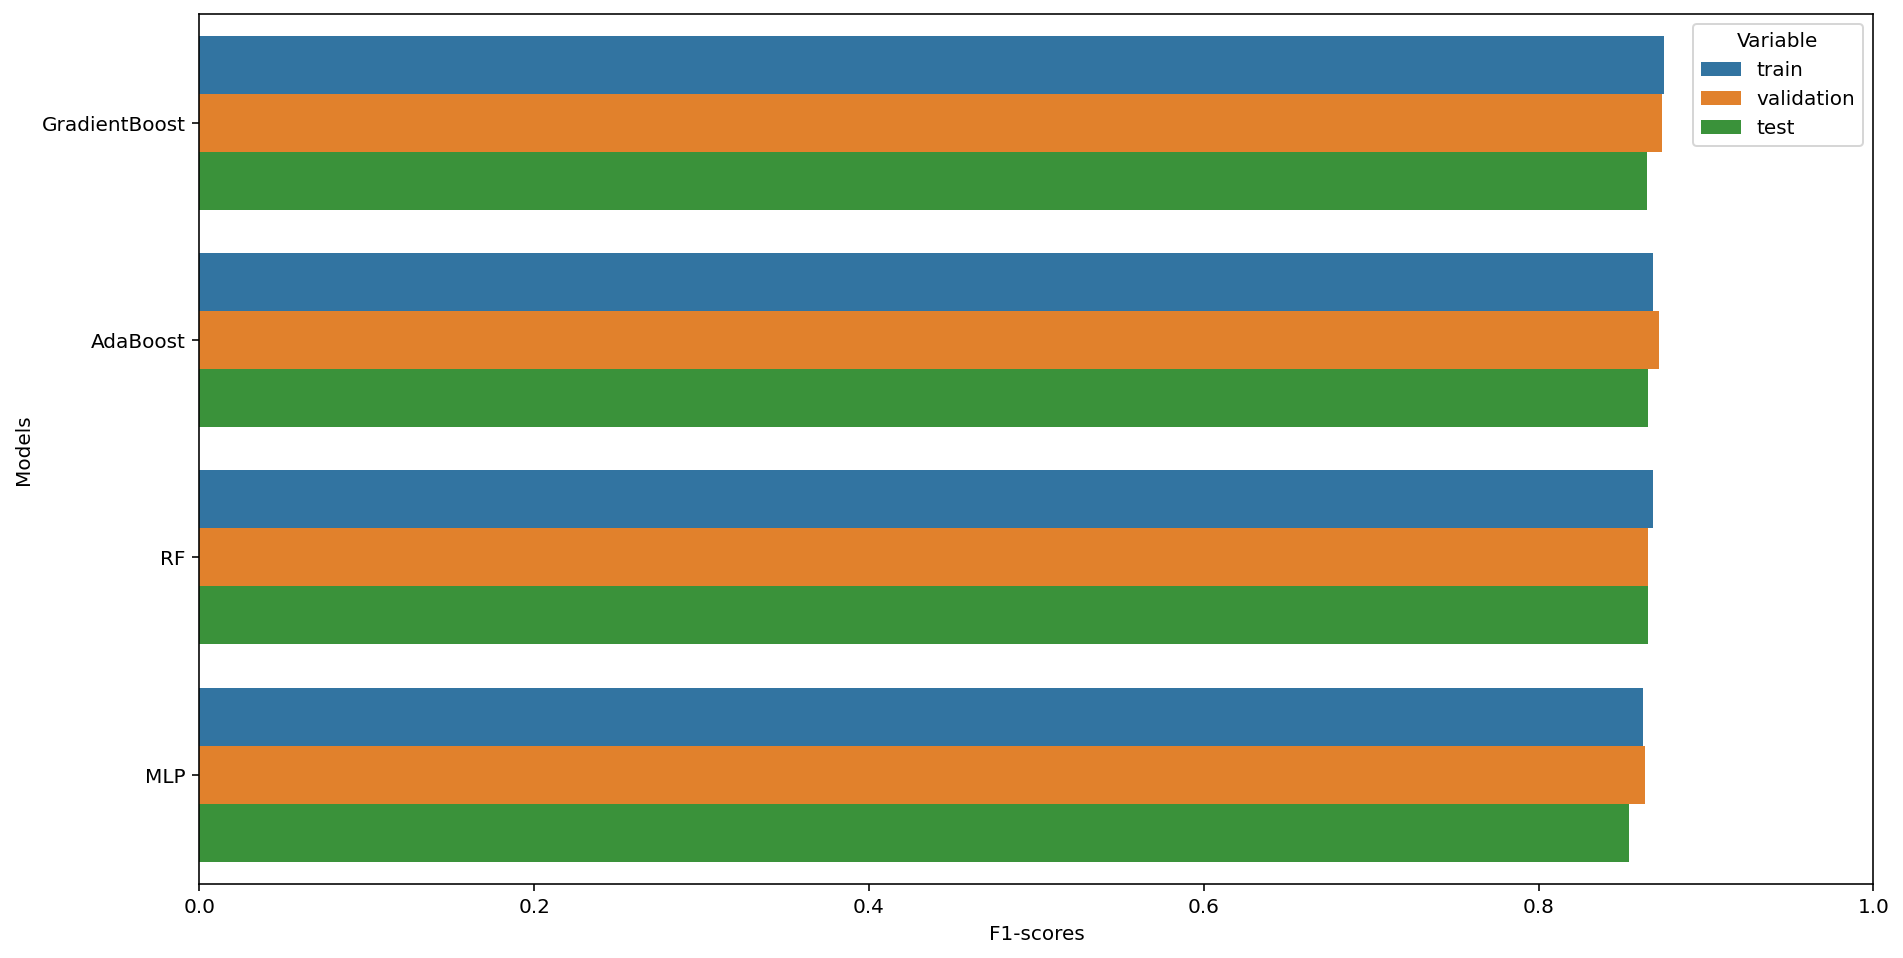

In [131]:
X_train_RC = X_train_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()
X_val_RC = X_val_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()
X_test_RC = X_test_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()

MLP_final = MLPClassifier(hidden_layer_sizes = (50,125,10), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, batch_size=600, max_iter = 1000,  alpha=0.00001, random_state = 15).fit(X_train_RC, y_train)

modelRF = RandomForestClassifier(n_estimators=200,max_depth=11,max_features='auto',bootstrap=True,criterion='entropy',min_samples_leaf=1,min_samples_split=25,random_state=42).fit(X_train_RC, y_train)

AdaBoost_Final = AdaBoostClassifier(n_estimators = 2500, learning_rate = 1, random_state = 15).fit(X_train_RC, y_train)

GradientBoost_Final = GradientBoostingClassifier(n_estimators=160, learning_rate=0.05, subsample=0.8, min_samples_split=105, min_samples_leaf=1, max_depth=7, max_features='sqrt', random_state=15).fit(X_train_RC, y_train)

models = [MLP_final, modelRF, AdaBoost_Final, GradientBoost_Final]

f1_micro_train = []
f1_micro_val = []
f1_micro_test = []

for i in models:
    f1_micro_train.append(f1_score(y_train, i.predict(X_train_RC), average = 'micro'))
    f1_micro_val.append(f1_score(y_val, i.predict(X_val_RC), average = 'micro'))
    f1_micro_test.append(f1_score(y_test, i.predict(X_test_RC), average = 'micro'))

final_scores = pd.DataFrame(zip(f1_micro_train, f1_micro_val, f1_micro_test), columns = ['train','validation', 'test'])
final_scores['col'] = ['MLP', 'RF', 'AdaBoost', 'GradientBoost']
final_scores = final_scores.melt(id_vars = 'col').rename(columns = str.title).sort_values(['Value'], ascending = False)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=final_scores)
plt.xlim(0,1)
plt.xlabel('F1-scores')
plt.ylabel('Models')
plt.show()

In [ ]:
final_metrics(y_train, AdaBoost_Final.predict(X_train_RC), y_val, AdaBoost_Final.predict(X_val_RC), y_test, AdaBoost_Final.predict(X_test_RC))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     10160
           1       0.76      0.61      0.68      2968

    accuracy                           0.87     13128
   macro avg       0.83      0.78      0.80     13128
weighted avg       0.86      0.87      0.86     13128

[[9601  559]
 [1168 1800]]
F1-score, micro:  0.8684491163924436
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

# **Kaggle**

In [ ]:
#1st submission!!!!!!!!!!!!!
#N apagar pls

#A partir de agora, sempre q fizerem uma submissão, acrescentem nas notas da submissao o codigo do modelo q tao a usar
#Eu para este primeiro esqueci me :(

#Second_NN = MLPClassifier(hidden_layer_sizes = (12, 20), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, batch_size=600, max_iter = 1000,  alpha=0.01, random_state = 15, verbose = 10)
#kaggle_V2_SecondTry = kaggle[X_train_V2_SecondTry.columns.to_list()]


#3rd Submission
# modelSVM = SVC(kernel='poly', degree=5)
# FirsT_BaggingSVM = BaggingClassifier(base_estimator = modelSVM, random_state = 5)
# FirsT_BaggingSVM.fit(X_train_Original, y_train)
# kaggle_V3_ThirdTry = kaggle[X_train_Original.columns.to_list()]


#4th Submission
# estimators = [('rf', RandomForestClassifier(random_state=5,max_depth=11,n_estimators=200)),('SVM', SVC(kernel='poly', degree = 5))]
# sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
# rf = RandomForestClassifier(random_state=5).fit(X_train_Original, y_train)
# SVM = SVC(kernel='poly', degree = 5).fit(X = X_train_Original, y = y_train)
# sc.fit(X_train_Original, y_train)
# kaggle_V4_FourthTry = kaggle[X_train_Original.columns.to_list()]

#5th
# X_train_RC = X_train_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()
# X_val_RC = X_val_Original.drop(columns = ['x3_Private Sector','x3_Self Employed', 'x0_Europe', 'x2_Other Family','x3_Public Sector', 'x0_Oceania', 'x2_Children', 'x0_America','x1_Not Married', 'x4_2nd Sector']).copy()

# estimators = [('rf', RandomForestClassifier(random_state=5,max_depth=17,n_estimators=150,min_samples_split=0.01,criterion='gini')),('MLP', MLPClassifier(hidden_layer_sizes = (50, 120,10), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, batch_size=600, max_iter = 1000,  alpha=0.00001, random_state = 15))]
# sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),passthrough=False)
# sc.fit(X_train_RC, y_train)
# kaggle_V5_FifthTry = kaggle[X_train_RC.columns.to_list()]